<a href="https://colab.research.google.com/github/AndresPautrat/MachineLearning_UPC/blob/main/SegundaMitad2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Validación Modelos

## 1.1. Validación Errónea

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
modelo = KNeighborsClassifier(n_neighbors=1)

Entrenamos el modelo con un solo vecino K=1.

In [ ]:
modelo.fit(X,y)
y_modelo = modelo.predict(X)

from sklearn.metrics import accuracy_score
accuracy_score(y, y_modelo)

1.0

Error principal:
- La parte del dataset que es usado para entrenar, se usa también para el test.

## 1.2. Validación con Holdout

In [ ]:
from sklearn.model_selection import train_test_split
X1, X2, y1, y2 = train_test_split(X,y,train_size=0.5)
#Entrenar el modelo
modelo.fit(X1,y1)
#Evaluamos el modelo
y2_modelo = modelo.predict(X2)
accuracy_score(y2, y2_modelo)

0.9466666666666667

Tenemos un resultado un poco más realista en comparación con el test anterior.

## 1.3. Validación Cruzada

Hacemos dos validaciones para determinar la variabilidad del modelo

In [ ]:
y2_modelo = modelo.fit(X1,y1).predict(X2)
y1_modelo = modelo.fit(X2,y2).predict(X1)
accuracy_score(y1, y1_modelo), accuracy_score(y2, y2_modelo)

(0.9333333333333333, 0.9466666666666667)

Usamos la validación cruzada con k=10:

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(modelo, X, y, cv=10)

array([1.        , 0.93333333, 1.        , 0.93333333, 0.86666667,
       1.        , 0.86666667, 1.        , 1.        , 1.        ])

## 1.4. Validación Leave-One-Out

In [ ]:
from sklearn.model_selection import LeaveOneOut
leaveOneOut = LeaveOneOut()
print("Deben realizarse {} splits".format(leaveOneOut.get_n_splits(X)))

Deben realizarse 150 splits


In [ ]:
X.shape

(150, 4)

In [ ]:
#Función para calcular el promedio de scores con Leave-one-out
def promedio(lista):
  return sum(lista)/len(lista)

#Programa principal
scores = []
for train_index, test_index in leaveOneOut.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  y_modelo = modelo.fit(X_train, y_train).predict(X_test)
  score = accuracy_score(y_test, y_modelo)
  scores.append(score)
print(scores)  
prom = promedio(scores)
print("Promedio: ", prom)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Promedio:  0.96


## 1.5. Usar curvas de resultados para Validación

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Unrecognized location 'Mejor'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Unrecognized location 'Mejor'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


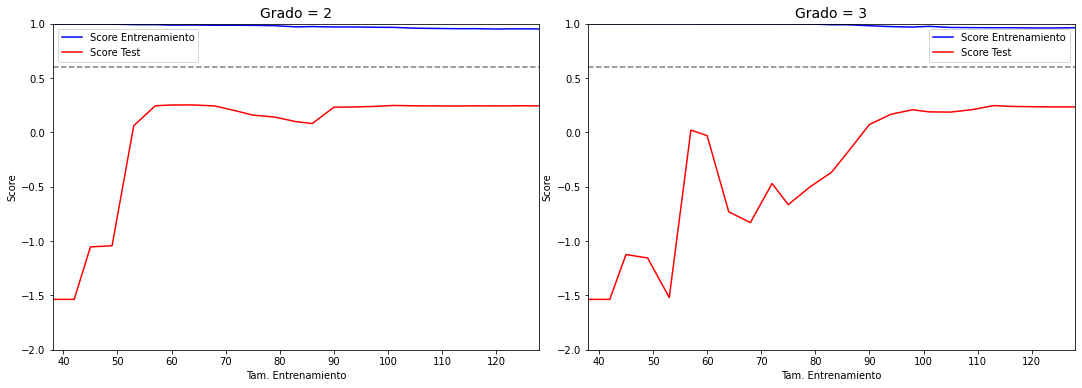

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
def promedio(lista):
  return sum(lista)/len(lista)

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

from sklearn.model_selection import learning_curve

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for i, grado in enumerate([2, 3]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(grado),
                                         X, y, cv=7,
                                         train_sizes=np.linspace(0.3, 1, 25))
    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='Score Entrenamiento')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='Score Test')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')
    ax[i].set_ylim(-2, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('Tam. Entrenamiento')
    ax[i].set_ylabel('Score')
    ax[i].set_title('Grado = {0}'.format(grado), size=14)
    ax[i].legend(loc='Mejor')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Unrecognized location 'Mejor'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Unrecognized location 'Mejor'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


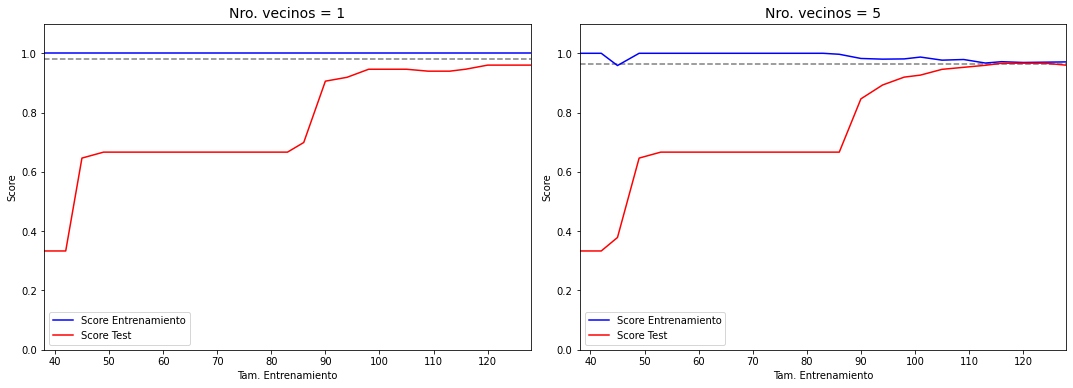

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
def promedio(lista):
  return sum(lista)/len(lista)

from sklearn.model_selection import learning_curve
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for i, n_vecinos in enumerate([1, 5]):
    N, train_lc, val_lc = learning_curve(KNeighborsClassifier(n_neighbors=n_vecinos),
                                         X, y, cv=7,
                                         train_sizes=np.linspace(0.3, 1, 25))
    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='Score Entrenamiento')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='Score Test')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')
    ax[i].set_ylim(0, 1.1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('Tam. Entrenamiento')
    ax[i].set_ylabel('Score')
    ax[i].set_title('Nro. vecinos = {0}'.format(n_vecinos), size=14)
    ax[i].legend(loc='Mejor')

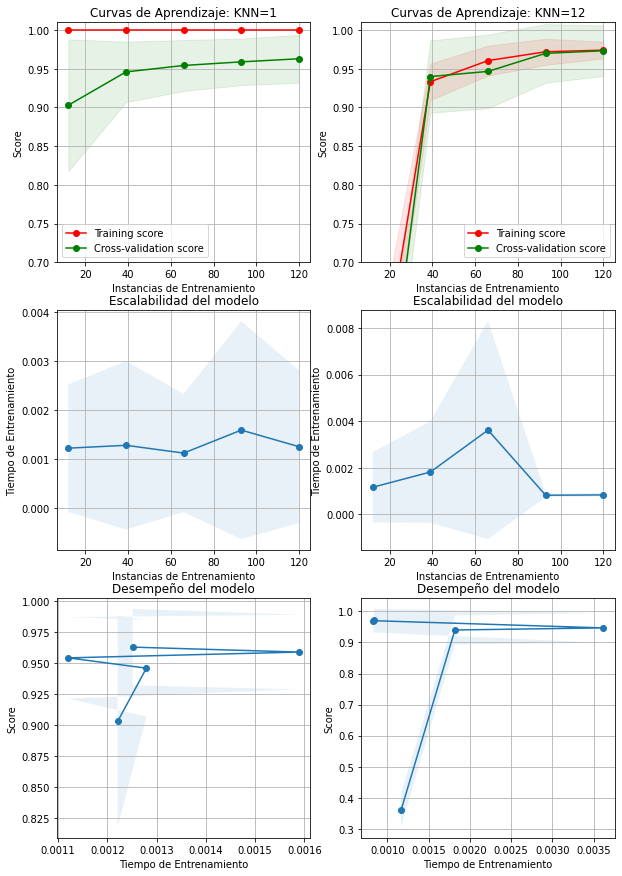

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Instancias de Entrenamiento")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Instancias de Entrenamiento")
    axes[1].set_ylabel("Tiempo de Entrenamiento")
    axes[1].set_title("Escalabilidad del modelo")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("Tiempo de Entrenamiento")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Desempeño del modelo")
    return plt


fig, axes = plt.subplots(3, 2, figsize=(10, 15))
#Primer clasificador
title = "Curvas de Aprendizaje: KNN=1"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = KNeighborsClassifier(n_neighbors=1)
plot_learning_curve(estimator, title, X, y, axes=axes[:, 0], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)
# Segundo clasificador
title = r"Curvas de Aprendizaje: KNN=12"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = KNeighborsClassifier(n_neighbors=12)
plot_learning_curve(estimator, title, X, y, axes=axes[:, 1], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)
plt.show()

- Modelo con un bias que es alto: el desempeño en el conjunto de entrenamiento y test llegan a ser prácticamente similares.
- Modelo con varianza alta: el desempeño en el conjunto de test llegar a ser peor que en el conjunto de entranamiento.

# 2. Regresión

## 2.1. Función Polinomial

Tenemos un dataset cuya distribución de registros llega a ser no lineal:

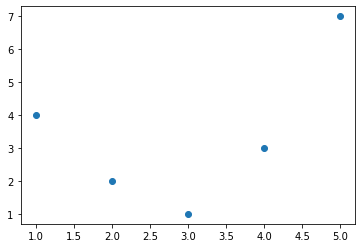

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1,2,3,4,5])
y = np.array([4,2,1,3,7])
plt.scatter(x,y)

Si aplicamos regresión lineal, tendríamos que la recta trazada no se ajusta a los datos para efectuar la regresión correctamente:

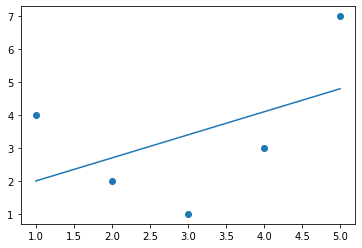

In [ ]:
from sklearn.linear_model import LinearRegression
X = x[:, np.newaxis]
modelo = LinearRegression().fit(X,y)
yfit = modelo.predict(X)
plt.scatter(x,y)
plt.plot(x,yfit);

In [ ]:
print(X)

[[1]
 [2]
 [3]
 [4]
 [5]]


Transformación de datos: agregamos un nuevo feature para gestionar la flexibilidad del modelo. 

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias = False)
X_2 = poly.fit_transform(X)
print(X_2)

[[ 1.  1.]
 [ 2.  4.]
 [ 3.  9.]
 [ 4. 16.]
 [ 5. 25.]]


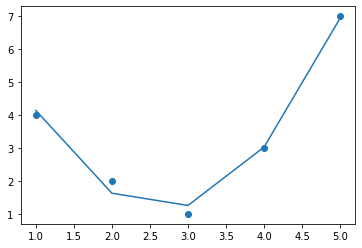

In [ ]:
modelo = LinearRegression().fit(X_2, y)
yfit = modelo.predict(X_2)
plt.scatter(x,y)
plt.plot(x,yfit);

Se genera una matriz de features con grado 3, 2 features construídos a partir del original, representando: $X$, $X^2$, $X^3$. 

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias = False)
X_3 = poly.fit_transform(X)
print(X_3)

[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]]


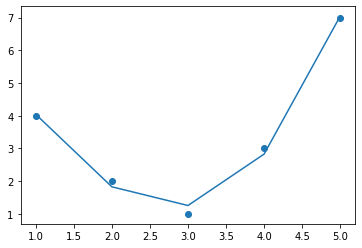

In [ ]:
modelo = LinearRegression().fit(X_3, y)
yfit = modelo.predict(X_3)
plt.scatter(x,y)
plt.plot(x,yfit)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=5, include_bias = False)
X_5 = poly.fit_transform(X)
print(X_5)

[[1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [2.000e+00 4.000e+00 8.000e+00 1.600e+01 3.200e+01]
 [3.000e+00 9.000e+00 2.700e+01 8.100e+01 2.430e+02]
 [4.000e+00 1.600e+01 6.400e+01 2.560e+02 1.024e+03]
 [5.000e+00 2.500e+01 1.250e+02 6.250e+02 3.125e+03]]


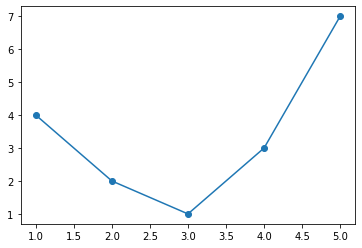

In [ ]:
modelo = LinearRegression().fit(X_5, y)
yfit = modelo.predict(X_5)
plt.scatter(x,y)
plt.plot(x,yfit)

En vez de cambiar el modelo, lo que hacemos es crear nuevas dimensiones para lidiar con la complejidad del problema.

## 2.2. Regresión Lineal

Un modelo de la forma: $y = ax + b$, donde $a$ es la pendiente y $b$ es el intercepto.

Tenemos que la data proviene de la forma: $y \approx 2x - 5$

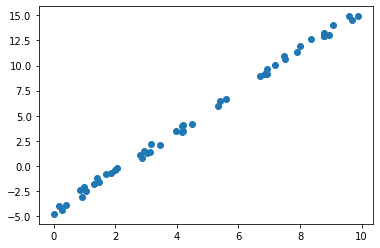

In [ ]:
rng = np.random.RandomState(1)
x = 10*rng.rand(50)
y = 2*x - 5 + rng.random(50)
plt.scatter(x,y);

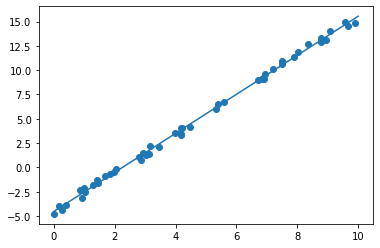

In [ ]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression(fit_intercept=True)
modelo.fit(x[:,np.newaxis], y)
xfit = np.linspace(0,10,1000)
yfit = modelo.predict(xfit[:,np.newaxis])
plt.scatter(x,y)
plt.plot(xfit, yfit);

Debemos identificar tanto la pendiente como el intercepto:

In [ ]:
print("La pendiente del modelo es: {}".format(modelo.coef_[0]))


La pendiente del modelo es: 2.0082302432277497


In [ ]:
print("El intercepto del modelo es: {}".format(modelo.intercept_))

El intercepto del modelo es: -4.533652972099125


La regresión lineal puede generar modelos lineales multidimensionales:
$$y = a_0 + a_1x_1 + a_2 x_2 + \ldots$$

## 2.3. Función base de Regresión

Podemos usar un **pipeline** para utilizar nuestras funciones.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
modelo_polinomial = make_pipeline(PolynomialFeatures(3), LinearRegression())

Construímos un nuevo modelo de regresión lineal usando una función polinomial.

In [ ]:
print(rng.rand(5))

[0.01582124 0.92943723 0.69089692 0.99732285 0.17234051]


In [ ]:
print(2*rng.rand(5))

[0.2742715  1.86519093 1.39363632 0.13200035 1.51092611]


In [ ]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

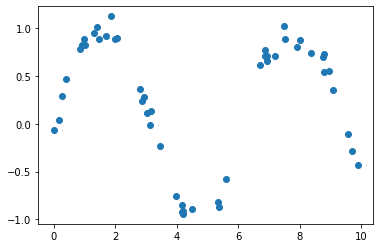

In [ ]:
plt.scatter(x,y)

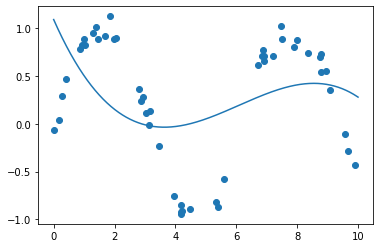

In [ ]:
modelo_polinomial.fit(x[:,np.newaxis], y)
yfit = modelo_polinomial.predict(xfit[:,np.newaxis])
plt.scatter(x,y)
plt.plot(xfit,yfit)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
modelo_polinomial_7 = make_pipeline(PolynomialFeatures(7), LinearRegression())

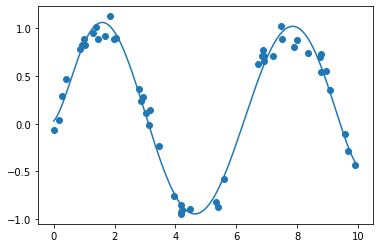

In [ ]:
modelo_polinomial_7.fit(x[:,np.newaxis], y)
yfit = modelo_polinomial_7.predict(xfit[:,np.newaxis])
plt.scatter(x,y)
plt.plot(xfit,yfit)

También se pueden aplicar funciones Gausianas:

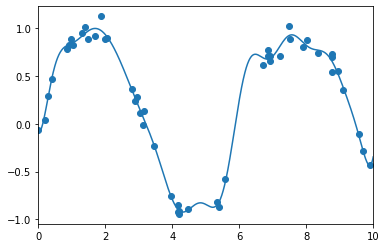

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)
    
gauss_model = make_pipeline(GaussianFeatures(20),
                            LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10);

In [ ]:
yfit

array([-7.44517643e-02, -7.80760102e-02, -7.97390637e-02, -7.95495784e-02,
       -7.76136873e-02, -7.40349712e-02, -6.89144295e-02, -6.23504558e-02,
       -5.44388154e-02, -4.52726268e-02, -3.49423461e-02, -2.35357546e-02,
       -1.11379495e-02,  2.16866223e-03,  1.63043666e-02,  3.11921432e-02,
        4.67576614e-02,  6.29292755e-02,  7.96380148e-02,  9.68175728e-02,
        1.14404292e-01,  1.32337149e-01,  1.50557730e-01,  1.69010214e-01,
        1.87641343e-01,  2.06400400e-01,  2.25239173e-01,  2.44111928e-01,
        2.62975373e-01,  2.81788623e-01,  3.00513157e-01,  3.19112784e-01,
        3.37553597e-01,  3.55803931e-01,  3.73834315e-01,  3.91617427e-01,
        4.09128044e-01,  4.26342993e-01,  4.43241099e-01,  4.59803130e-01,
        4.76011749e-01,  4.91851454e-01,  5.07308523e-01,  5.22370962e-01,
        5.37028440e-01,  5.51272239e-01,  5.65095190e-01,  5.78491617e-01,
        5.91457277e-01,  6.03989301e-01,  6.16086132e-01,  6.27747470e-01,
        6.38974208e-01,  

In [ ]:
y

array([-0.92530881,  0.71111718, -0.06598087,  0.11672496,  0.88294471,
        0.8210899 ,  1.12370616, -0.23467501, -0.75446517, -0.86898322,
       -0.94231439,  0.70804351,  0.89495535,  0.53638242,  0.28955648,
        0.61914583, -0.84603144, -0.5796531 ,  1.01611705,  0.88180869,
        0.87399567, -0.28992469, -0.01353862,  0.65589053,  0.69771523,
        0.55374595,  0.78013085,  0.46920917,  0.91644209,  0.72516826,
        0.8837173 , -0.90676173, -0.10465615, -0.82186313,  0.70681199,
        0.13841844,  0.76810625,  0.74161023,  0.03745364,  0.88805266,
       -0.43137564,  1.01910093,  0.36236496,  0.7970268 ,  0.82783992,
       -0.89007576,  0.35538665,  0.28020998,  0.23855606,  0.94355877])

## 2.4. Regularización
El objetivo de la regularización es hacer el modelo de regresión lineal más flexible. 
La regularización se enfoca en los hiperparámetros del modelo.

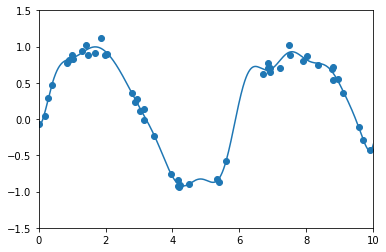

In [ ]:
modelo = make_pipeline(GaussianFeatures(20), LinearRegression())
modelo.fit(x[:,np.newaxis], y)
plt.scatter(x,y)
plt.plot(xfit, modelo.predict(xfit[:,np.newaxis]))
plt.xlim(0,10)
plt.ylim(-1.5,1.5);

Se presenta un modelo aparentemente sobreajusado sobre los datos.
Para observar la flexibilidad del modelo, podemos graficar los coeficientes:

In [ ]:
def plot_base(modelo, title=None):
  fig, ax = plt.subplots(2, sharex=True)
  modelo.fit(x[:, np.newaxis], y)
  ax[0].scatter(x,y)
  ax[0].plot(xfit, modelo.predict(xfit[:,np.newaxis]))
  ax[0].set(xlabel='x', ylabel='y', ylim=[-1.5, 1.5])

  if title:
    ax[0].set_title(title)

  ax[1].plot(modelo.steps[0][1].centers_, modelo.steps[1][1].coef_)  
  ax[1].set(xlabel='Función base', ylabel='Coeficiente', xlim=(0,10))


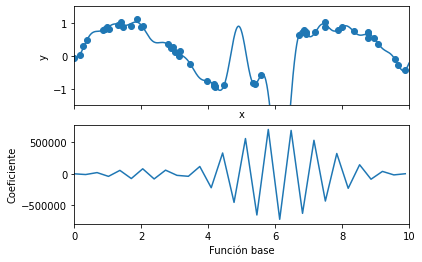

In [ ]:
modelo = make_pipeline(GaussianFeatures(30), LinearRegression())
plot_base(modelo)

Se aprecia un comportamiento de overfitting cuando los coeficientes superan los valores de los features.

In [ ]:
x

array([4.17022005e+00, 7.20324493e+00, 1.14374817e-03, 3.02332573e+00,
       1.46755891e+00, 9.23385948e-01, 1.86260211e+00, 3.45560727e+00,
       3.96767474e+00, 5.38816734e+00, 4.19194514e+00, 6.85219500e+00,
       2.04452250e+00, 8.78117436e+00, 2.73875932e-01, 6.70467510e+00,
       4.17304802e+00, 5.58689828e+00, 1.40386939e+00, 1.98101489e+00,
       8.00744569e+00, 9.68261576e+00, 3.13424178e+00, 6.92322616e+00,
       8.76389152e+00, 8.94606664e+00, 8.50442114e-01, 3.90547832e-01,
       1.69830420e+00, 8.78142503e+00, 9.83468338e-01, 4.21107625e+00,
       9.57889530e+00, 5.33165285e+00, 6.91877114e+00, 3.15515631e+00,
       6.86500928e+00, 8.34625672e+00, 1.82882773e-01, 7.50144315e+00,
       9.88861089e+00, 7.48165654e+00, 2.80443992e+00, 7.89279328e+00,
       1.03226007e+00, 4.47893526e+00, 9.08595503e+00, 2.93614148e+00,
       2.87775339e+00, 1.30028572e+00])

La regularización permite penalizar a los coeficientes.

#### 2.4.1. Ridge (Regularización $L_2$)
Es un método de regularización típico en regresión lineal. 
Objetivo: es penalizar la suma de cuadrados de los coeficientes del modelo:
$$P = \alpha\sum_{n=1}^N \theta^2_n$$, donde $\alpha$ es un parámetro libre que controla la fortaleza de la penalidad.

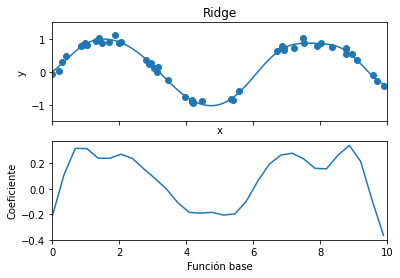

In [ ]:
from sklearn.linear_model import Ridge
modelo = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))
plot_base(modelo, title='Ridge')

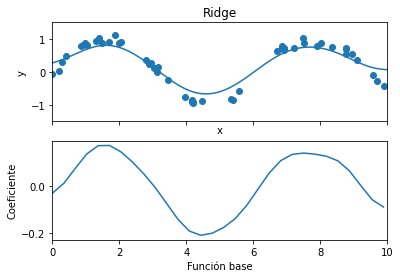

In [ ]:
from sklearn.linear_model import Ridge
modelo = make_pipeline(GaussianFeatures(30), Ridge(alpha=9))
plot_base(modelo, title='Ridge')

El parámetro $\alpha$ permite controlar la complejidad del modelo. Si $\alpha \to 0$, estamos hablando de la regresión lineal tradicional. Por otro lado, si $\alpha \to \infty$, el espacio de posibles modelos se reduce sustancialmente. 

### 2.4.2. Lasso (Regularización $L_1$)
Lasso penaliza la suma de valores absolutos en los coeficiente del modelo de regresión: 
$$P = \alpha\sum_{n=1}^{N}|\theta_n|$$

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002135815870488944, tolerance: 0.002065280097246271
  positive)


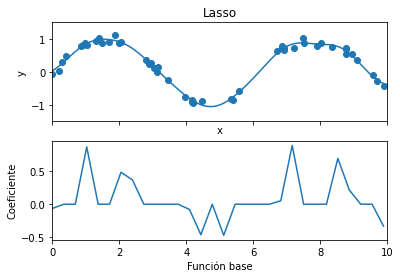

In [ ]:
from sklearn.linear_model import Lasso
modelo = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.001))
plot_base(modelo, title='Lasso')

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0030798617745369516, tolerance: 0.002065280097246271
  positive)


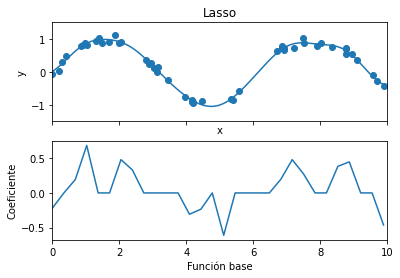

In [ ]:
from sklearn.linear_model import Lasso
modelo = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.0005))
plot_base(modelo, title='Lasso')

Con la penalidad de Lasso, la mayoría de coeficientes llegan a ser cero. 

In [ ]:
modelo.predict(xfit[:,np.newaxis])

array([ 8.14433215e-03,  1.50858362e-02,  2.21439178e-02,  2.93173001e-02,
        3.66046197e-02,  4.40044264e-02,  5.15151839e-02,  5.91352703e-02,
        6.68629784e-02,  7.46965168e-02,  8.26340105e-02,  9.06735015e-02,
        9.88129503e-02,  1.07050237e-01,  1.15383161e-01,  1.23809446e-01,
        1.32326736e-01,  1.40932601e-01,  1.49624539e-01,  1.58399973e-01,
        1.67256257e-01,  1.76190676e-01,  1.85200451e-01,  1.94282735e-01,
        2.03434620e-01,  2.12653140e-01,  2.21935267e-01,  2.31277921e-01,
        2.40677969e-01,  2.50132224e-01,  2.59637455e-01,  2.69190383e-01,
        2.78787689e-01,  2.88426012e-01,  2.98101955e-01,  3.07812088e-01,
        3.17552948e-01,  3.27321046e-01,  3.37112866e-01,  3.46924873e-01,
        3.56753510e-01,  3.66595206e-01,  3.76446378e-01,  3.86303434e-01,
        3.96162774e-01,  4.06020799e-01,  4.15873906e-01,  4.25718500e-01,
        4.35550991e-01,  4.45367800e-01,  4.55165361e-01,  4.64940125e-01,
        4.74688564e-01,  

In [ ]:
y

array([-0.92530881,  0.71111718, -0.06598087,  0.11672496,  0.88294471,
        0.8210899 ,  1.12370616, -0.23467501, -0.75446517, -0.86898322,
       -0.94231439,  0.70804351,  0.89495535,  0.53638242,  0.28955648,
        0.61914583, -0.84603144, -0.5796531 ,  1.01611705,  0.88180869,
        0.87399567, -0.28992469, -0.01353862,  0.65589053,  0.69771523,
        0.55374595,  0.78013085,  0.46920917,  0.91644209,  0.72516826,
        0.8837173 , -0.90676173, -0.10465615, -0.82186313,  0.70681199,
        0.13841844,  0.76810625,  0.74161023,  0.03745364,  0.88805266,
       -0.43137564,  1.01910093,  0.36236496,  0.7970268 ,  0.82783992,
       -0.89007576,  0.35538665,  0.28020998,  0.23855606,  0.94355877])

## 2.5. Medidas de desempeño

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston
from sklearn.metrics import r2_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Cargamos un dataset: Boston
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
X = boston.data
Y = boston.target

In [ ]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)

In [ ]:
#Target
df['Price'] = boston.target

In [ ]:
df.head()

CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  Price
0  0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98   24.0
1  0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14   21.6
2  0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03   34.7
3  0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94   33.4
4  0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33   36.2

[5 rows x 14 columns]

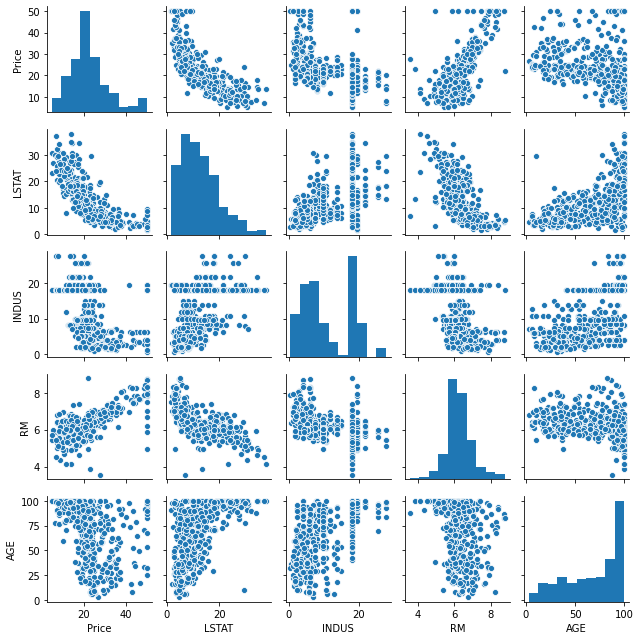

In [ ]:
cols = ['Price', 'LSTAT', 'INDUS', 'RM', 'AGE']
sns.pairplot(df[cols], palette='coolwarm', height=1.8)
plt.tight_layout()

In [ ]:
modelo = LinearRegression()
#Entrenamiento
modelo.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
Y_pred = modelo.predict(X)

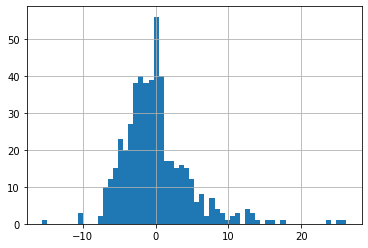

In [ ]:
#Graficar los errores a partir de los valores predecidos
pd.Series(Y-Y_pred).hist(bins=60)

In [ ]:
#Hallamos al intercepto
print(modelo.intercept_)

36.459488385090125


In [ ]:
#Calculamos el error R cuadrado
r2 = r2_score(Y, Y_pred)
print("R2: {:.2}".format(r2))

R2: 0.74


In [ ]:
#Validación cruzada 
from sklearn.model_selection import cross_val_predict
pred_cv = cross_val_predict(modelo, X, Y, cv = 10)

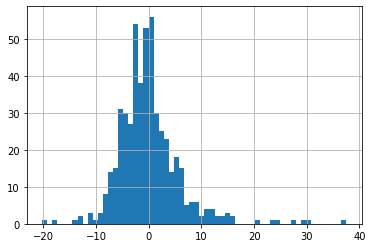

In [ ]:
pd.Series(Y-pred_cv).hist(bins=60)

## 2.5.1. MAE
Media de los valores absolutos de los errores:
$MAE = \frac{1}{n}\sum_{i=1}^{n} |y_i - \hat{y}_i|$

In [ ]:
#Calculando el MAE
from sklearn.metrics import mean_absolute_error
print(f"MAE: {mean_absolute_error(Y, pred_cv)}")

MAE: 3.9973058525932488


## 2.5.2. MSE
Mean Squared Error:
$$MSE = \sqrt(\frac{1}{n}\sum_{i=1}^n (y_i - \hat{y_i})^2$$

Es la raíz cuadrada de la media de los errores al cuadrado. 
Este valor nos indica cuán cerca están los valores predecidos de los valores actuales. Procuramos que esta tasa sea muy pequeño. 

In [ ]:
#Calculando el MSE
from sklearn.metrics import mean_squared_error
print(f"MSE: {mean_squared_error(Y, pred_cv)}")

MSE: 34.539659539993245


# Support Vector Machines
Es un enfoque de clasificación **discriminativo**.

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()

## 3.1. SVM en una tarea de Clasificación

Creamos un dataset:

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


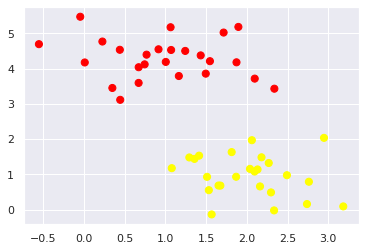

In [ ]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers = 2, random_state = 0, cluster_std = 0.6)
plt.scatter(X[:,0],X[:, 1], c=y, s=50, cmap='autumn')

In [ ]:
xfit = np.linspace(0,20)
print(len(xfit))
for j in range(len(xfit)):
  print(xfit[j])

50
0.0
0.40816326530612246
0.8163265306122449
1.2244897959183674
1.6326530612244898
2.0408163265306123
2.4489795918367347
2.857142857142857
3.2653061224489797
3.673469387755102
4.081632653061225
4.4897959183673475
4.8979591836734695
5.3061224489795915
5.714285714285714
6.122448979591837
6.530612244897959
6.938775510204081
7.346938775510204
7.755102040816327
8.16326530612245
8.571428571428571
8.979591836734695
9.387755102040817
9.795918367346939
10.204081632653061
10.612244897959183
11.020408163265307
11.428571428571429
11.83673469387755
12.244897959183675
12.653061224489797
13.061224489795919
13.46938775510204
13.877551020408163
14.285714285714286
14.693877551020408
15.10204081632653
15.510204081632654
15.918367346938776
16.3265306122449
16.73469387755102
17.142857142857142
17.551020408163264
17.95918367346939
18.367346938775512
18.775510204081634
19.183673469387756
19.591836734693878
20.0


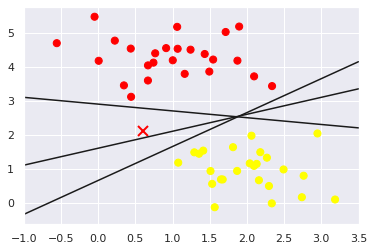

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap="autumn")
plt.plot([0.6],[2.1], 'x', color='red', markeredgewidth=2, markersize=10)
for m,b in [(1,0.65), (0.5,1.6), (-0.2, 2.9)]:
  plt.plot(xfit,m*xfit+b, '-k')
  plt.xlim(-1,3.5);

Problema de decisión: si agregamos un nuevo dato, dependiendo de la recta que se elija, el resultado será diferente.

## 3.2. Maximización del Margen
- En vez de dibujar una simple línea entre dos clases...
- ... podemos dibujar una línea con una cierta longitud de margen cerca del punto 'X'

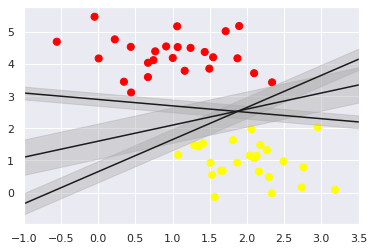

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap="autumn")
#plt.plot([0.6],[2.1], 'x', color='red', markeredgewidth=2, markersize=10)
for m,b,d in [(1,0.65,0.33), (0.5,1.6, 0.55), (-0.2, 2.9, 0.2)]:
  yfit = m*xfit + b
  plt.plot(xfit, yfit, '-k')
  plt.fill_between(xfit, yfit-d, yfit+d, edgecolor='none', color='#AAAAAA', alpha=0.4)
  plt.xlim(-1,3.5);

La idea SVM es maximizar el margen. El hiperplano que maximice el margen, será elegido como modelo óptimo.


## 3.3. Ajuste a SVM
Usamos un SVM con un kernel lineal:

In [ ]:
from sklearn.svm import SVC 
modelo = SVC(kernel='linear', C=1E10)
modelo.fit(X,y)

NameError: ignored

In [ ]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    # Crear un grid para evaluar el modelo
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y,x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P=model.decision_function(xy).reshape(X.shape)
    #dibujamos  la frontera de decision y los margenes
    #ax.contour(X,Y,P,color='k', levels=[-1,0,1], alpha=0.5, linestyles=['--', '-', '--'])
    ax.contour(X,Y,P,color='k', levels=[-1,0,1], alpha=0.5, linestyles=['--', '-', '--'])
    #dibujar vectores de soporte
    if plot_support:
        ax.scatter(model.support_vectors_[:,0], model.support_vectors_[:,1], s=300, linewidth=1, facecolors='none');
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: The following kwargs were not used by contour: 'color'
  


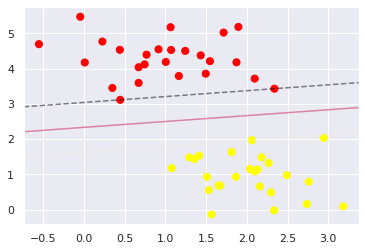

In [ ]:
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(modelo);

La línea roja es la que maximiza el margen entre ambas clases.
Los ejemplos de entrenamiento tocan levemente el margen y son llamados **vectores de soporte**, ese término es el que da nombre al algoritmo.

Nosotros podemos identificar los vectores de soporte.

In [ ]:
print("Vectores de soporte: ", modelo.support_vectors_)

Vectores de soporte:  [[0.44359863 3.11530945]
 [2.33812285 3.43116792]
 [2.06156753 1.96918596]]


- Para el entrenamiento de SVM, importa la posición de los vectores de soporte
- Cualquier punto o ejemplo que esté lejos del margen, no modifica la fase de entrenamiento.

## 3.4. Kernel SVM
- SVM llega  a ser robusto cuando se combina con kernels.
- Hemos visto una versión de kernel anteriormente en regresión lineal.
- Permite proyectar nuestros datos en un espacio dimensional mayor que el original a través de funciones polinomiales y gausianas.
- Esto sucede cuando los dato no son linealmente separables

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: The following kwargs were not used by contour: 'color'
  


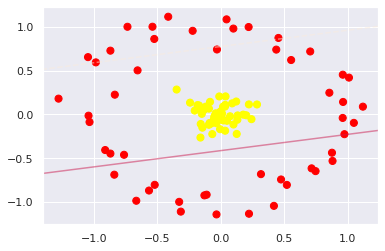

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()
from sklearn.svm import SVC
modelo = SVC(kernel='linear', C=1E10)

#Generamos un dataset linealmente no separable
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)
clf = SVC(kernel='linear').fit(X,y)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

- La discriminación lineal no es capaz de separa los datos de la clase amarillas de la roja.
- Podemos proyectar los datos en una dimensión más alta que permita usar un separador lineal sin problemas. 


In [ ]:
from sklearn import svm, datasets
from sklearn.model_selection import cross_val_score
X, y = datasets.load_iris(return_X_y=True)
clf = svm.SVC()
cross_val_score(clf, X,y, cv=5, scoring='recall_macro')

array([0.96666667, 0.96666667, 0.96666667, 0.93333333, 1.        ])

In [ ]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)
clf = SVC(kernel='linear').fit(X,y)
from mpl_toolkits import mplot3d
r = np.exp(-(X**2).sum(1))
def plot_3D(elev=30, azim=30, X=X, y=y):
  ax = plt.subplot(projection = '3d')
  ax.scatter3D(X[:,0], X[:,1], r, c=y, s=50, cmap='autumn')
  ax.view_init(elev=elev, azim=azim)
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_zlabel('z')


In [ ]:
from ipywidgets import interact, fixed
interact(plot_3D, elev=[-90,90], azip=(-180,180), X=fixed(X), y=fixed(y));

interactive(children=(Dropdown(description='elev', options=(-90, 90), value=-90), IntSlider(value=30, descript…

### Radial Basis Function


In [ ]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X,y)

SVC(C=1000000.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: The following kwargs were not used by contour: 'color'
  


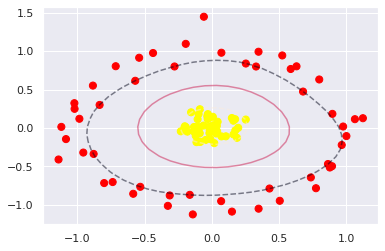

In [ ]:
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)

## Suavizamiento de Márgenes en SVM
Cuando los datos de dos clases diferentes se superponen, tendríamos problems con nuestros márgenes en SVM.

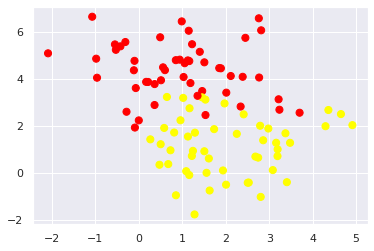

In [ ]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples = 100, centers=2, random_state=0, cluster_std=1.2)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='autumn')

El parámetro $C$ se usa para manipular el margen:
- Si $C$ es un valor grande, el margen es duro
- Si $C$ es pequeño, el margen es suave. 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: The following kwargs were not used by contour: 'color'
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: The following kwargs were not used by contour: 'color'
  


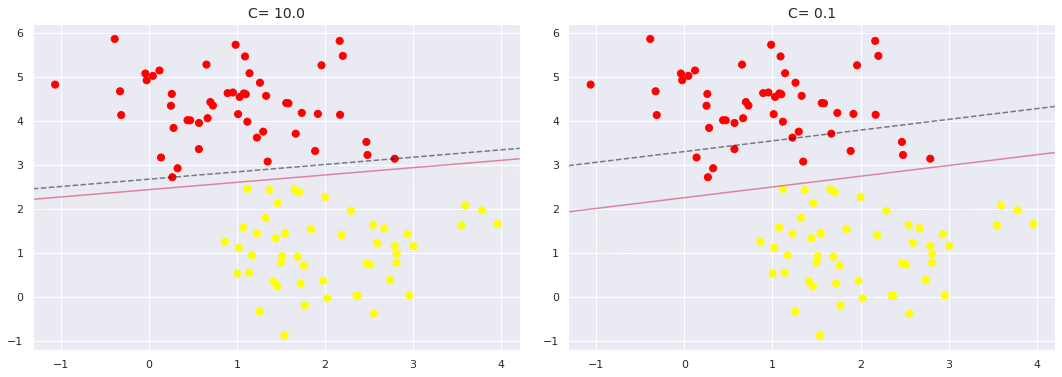

In [ ]:
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)
fig, ax = plt.subplots(1,2,figsize=(16,6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
  modelo = SVC(kernel='linear', C=C).fit(X,y)
  axi.scatter(X[:,0], X[:,1], c=y, s=50, cmap='autumn')
  plot_svc_decision_function(modelo, axi)
  axi.scatter(modelo.support_vectors_[:,0], modelo.support_vectors_[:,1], s=300, lw=1, facecolors='none');
  axi.set_title('C= {0:.1f}'.format(C), size=14)

El valor óptimos del hiperparámetro $C$ depende del dataset.

# Redes Bayesianas

## Probabilidades Marginales, Condicionales y Conjuntas
$$
P(A) = 0.3333
$$

$$
P(B) = 0.25
$$

$$
P(A\cap B) = 0.2
$$

$$
P(A\mid B) = ?
$$

In [ ]:
Pa = 0.3333
Pb = 0.25
Pab = 0.2


$$
P(A\mid B) = \frac{P(A\cap B)}{P(B)}
$$

In [ ]:
Pa_dado_b = Pab/Pb
print("Condicional P(A|B): ", Pa_dado_b)

Condicional P(A|B):  0.8


$$
P(B\mid A) = \frac{P(A\cap B)}{P(A)}
$$

In [ ]:
Pb_dado_a = Pab/Pa
print("Condicional P(B|A): ", Pb_dado_a)

Condicional P(B|A):  0.6000600060006002


## Definiciones principales
### Probabilidad Marginal 
$$
P(A=a) = \frac{M[A=a]}{M}
$$
donde $M$ es el total de instancias en el dataset de entrenamiento.

### Probabilidad Conjunta
$$
P(A=a\cap B=b) = \frac{M[A=a\cap B=b]}{M}
$$

### Probabilidad Condicional
$$
P(A=a\mid B=b) = \frac{P(A=a\cap B=b)}{P(B=b)}
$$

$$
P(A=a\mid B=b) = \frac{\frac{M[A=a\cap B=b]}{M}}{\frac{M[B=b]}{M}}
$$

$$
P(A=a\mid B=b) = \frac{M[A=a\cap B=b]}{M[B=b]}
$$

### Ejemplo: Operador AND

P | Q | P AND Q | RB
--- | --- | --- | ---
0 | 0 | 0 | ?
1 | 0 | 0 | ?
0 | 1 | 0 | ?
1 | 1 | 1 | ?

Mejor, renombramos como:

$X_1$ | $X_2$ | Y | $Y_{pred}$
--- | --- | --- | ---
0 | 0 | 0 | ?
1 | 0 | 0 | ?
0 | 1 | 0 | ?
1 | 1 | 1 | ?


#### ¿Cuál es nuestra hipótesis?

Según la tabla, nosotros sabemos que: 
- cuando P=0, Q=0, entonces P AND Q = 0
- cuando P=1, Q=0, entonces P AND Q = 0
- cuando P=0, Q=1, entonces P AND Q = 0
- cuando P=1, Q=1, entonces P AND Q = 1

In [ ]:
# Instalamos Graphviz
!apt install -y graphviz
!pip install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 32 not upgraded.


In [ ]:
from graphviz import Digraph
estructura1 = Digraph()
estructura1.edge("Y", "X1")
estructura1.edge("Y", "X2")

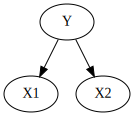

In [ ]:
estructura1

$$
P(Y\mid X_1\cap X_2) \approx P(Y)\times P(X_1\mid Y)\times P(X_2\mid Y)
$$


$X_1$ | $X_2$ | Y | $Y_{pred}$
--- | --- | --- | ---
0 | 0 | 0 | ?
1 | 0 | 0 | ?
0 | 1 | 0 | ?
1 | 1 | 1 | ?


Desarrollando la distribución $P(Y)$:

Y | P(Y)
--- | ---
0 | 0.75
1 | 0.25

Desarrollando la distribución condicional $P(X_1\mid Y)$:

$X_1$ | $Y$ | $P(X_1\mid Y) $
--- | --- | ---
0 | 0 | 0.66667
0 | 1 | 0
1 | 0 | 0.3333
1 | 1 | 1


Desarrollando la distribución condicional $P(X_2\mid Y)$:

$X_2$ | $Y$ | $P(X_2\mid Y) $
--- | --- | ---
0 | 0 | 0.66667
0 | 1 | 0
1 | 0 | 0.3333
1 | 1 | 1

In [ ]:
#Usando la hipótesis
data_X1 = [0,1,0,1]
data_X2 = [0,0,1,1]
data_Y = [0,0,0,1]

P_Y_0 = 0.75
P_Y_1 = 1-P_Y_0


# M[Y=0] = 3
# M[X1=0, X2=0] = 1
# M[X2=0] = 2


Calculando: 
$$
P(X_1 = 0\mid Y=0)
$$

In [ ]:
P_X1_0_dado_Y_0 = 0.667

Caculando: 
$$
P(X_1 = 1 \mid Y = 0)
$$

In [ ]:
P_X1_1_dado_Y_0 = 0.3333 # P

Calculando: 
$$
P(X_1 = 0 \mid Y=1) = \frac{M[X_1=0\cap Y=1]}{M[Y=1]} = \frac{0}{1} = 0
$$

In [ ]:
P_X1_0_dado_Y_1 = 0

Calculando: 
$$
P(X_1 = 1 \mid Y=1)
$$

In [ ]:
P_X1_1_dado_Y_1 = 1 - P_X1_0_dado_Y_1
print(P_X1_1_dado_Y_1)

1


Calculando: 
$$
P(X_2 = 0\mid Y=0) = \frac{M[X_2=0\cap Y=0]}{M[Y=0]} = \frac{2}{3}
$$

In [ ]:
P_X2_0_dado_Y_0 = 2/3
P_X2_1_dado_Y_0 = 1 - P_X2_0_dado_Y_0

Calculando: 
$$
P(X_2=0\mid Y_1) = \frac{M[X_2=0\cap Y=1]}{M[Y=1]} = \frac{0}{1} = 0
$$

In [ ]:
P_X2_0_dado_Y_1 = 0
P_X2_1_dado_Y_1 = 1 - P_X2_0_dado_Y_1


### Haciendo predicciones (inferencia)

Si $X_1 = 0$ y $X_2 = 1$, ¿Cuál es el valor de $Y$? ($X_1$ AND $X_2$)
Y = 0,  es la repuesta real
Y_pred = ?

$$
Y_{pred} = arg max (P(Y\mid X_1, X_2))
$$

Consulta:
$$
P(Y\mid X_1\cap X_2) \approx P(Y)\times P(X_1\mid Y)\times P(X_2\mid Y)
$$

Si instanciamos los datos de test, sabemos que $X_1=0$, $X_2=1$ pero no sabemos cuánto vale $Y$:

- Consulta 1: $$
P(Y=0\mid X_1=0\cap X_2=1) \approx P(Y=0)\times P(X_1=0\mid Y=0)\times P(X_2=1\mid Y=0)
$$
- Consulta 2: $$
P(Y=1\mid X_1=0\cap X_2=1) \approx P(Y=1)\times P(X_1=0\mid Y=1)\times P(X_2=1\mid Y=1)
$$

In [ ]:
Consulta_1 = P_Y_0 * P_X1_0_dado_Y_0 * P_X2_1_dado_Y_0 #preguntamos por Y=0
Consulta_2 = P_Y_1 * P_X1_0_dado_Y_1 * P_X2_1_dado_Y_1  #preguntamos por Y=1
print("Esta es la probabilidad de que Y=0, considerando X1=0 y X2=1: ",Consulta_1)
print("Esta es la probabilidad de que Y=1, considerando X1=0 y X2=1: ",Consulta_2)

Esta es la probabilidad de que Y=0, considerando X1=0 y X2=1:  0.16675000000000004
Esta es la probabilidad de que Y=1, considerando X1=0 y X2=1:  0.0


Por lo tanto, clasificamos a este caso de test como: 
$$
Y_{pred} = 0
$$

Cuando la variable target (clase) es la única que condiciona a todas las variables sin excepción, entonces hablamos de: Naive Bayes.

Pero también podríamos tener otra hipótesis que no necesariamente es Naive Bayes:

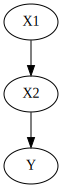

In [ ]:
estructura2 = Digraph()
estructura2.edge("X2", "Y")
estructura2.edge("X1", "X2")
estructura2

$$
P(Y\mid X_1\cap X_2) \approx P(X_1)\times P(X_2\mid X_1) \times P(Y\mid X_2)
$$

##Redes Bayesianas en Sklearn

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


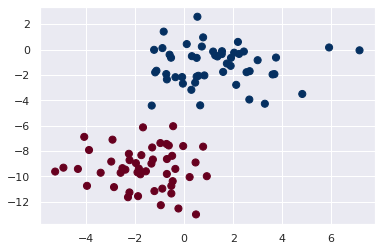

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='RdBu');

In [ ]:
from sklearn.naive_bayes import GaussianNB
modelo = GaussianNB()
modelo.fit(X,y);

Ahora generamos datos de test:

In [ ]:
rng = np.random.RandomState(0)
X_test = [-6,-14] + [14,18]*rng.rand(2000,2)
y_test = modelo.predict(X_test)


Podemos graficar la frontera de decisión:

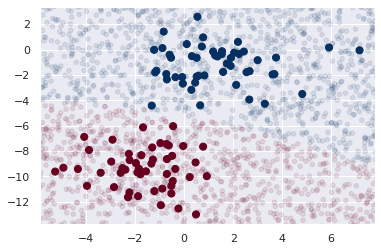

In [ ]:
plt.scatter(X[:,0] ,X[:,1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

In [ ]:
print(len(y_test))

2000


In [ ]:
yprob = modelo.predict_proba(X_test)
print(len(yprob))


2000


In [ ]:
#revisamos las últimas 8 probabilidades:
yprob[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

In [ ]:
yprob[1999][0].round(2)

0.15

In [ ]:
y_test[-8:]

array([0, 0, 0, 0, 0, 0, 1, 1])

In [ ]:
tam = len(y_test)
print("ID\tProbY0\tProbY1\tYpred")
for i in range(tam):
  print("{}\t{}\t{}\t{}".format((i+1),yprob[i][0].round(2), yprob[i][1].round(2), y_test[i]))

ID	ProbY0	ProbY1	Ypred
1	0.0	1.0	1
2	0.0	1.0	1
3	0.0	1.0	1
4	0.0	1.0	1
5	0.0	1.0	1
6	0.0	1.0	1
7	0.0	1.0	1
8	1.0	0.0	0
9	0.0	1.0	1
10	0.0	1.0	1
11	0.0	1.0	1
12	0.0	1.0	1
13	0.0	1.0	1
14	0.0	1.0	1
15	0.94	0.06	0
16	0.0	1.0	1
17	0.0	1.0	1
18	0.01	0.99	1
19	0.0	1.0	1
20	0.0	1.0	1
21	0.98	0.02	0
22	1.0	0.0	0
23	0.0	1.0	1
24	1.0	0.0	0
25	1.0	0.0	0
26	0.56	0.44	0
27	1.0	0.0	0
28	1.0	0.0	0
29	1.0	0.0	0
30	1.0	0.0	0
31	1.0	0.0	0
32	1.0	0.0	0
33	1.0	0.0	0
34	1.0	0.0	0
35	1.0	0.0	0
36	0.0	1.0	1
37	0.0	1.0	1
38	1.0	0.0	0
39	1.0	0.0	0
40	1.0	0.0	0
41	1.0	0.0	0
42	0.0	1.0	1
43	1.0	0.0	0
44	1.0	0.0	0
45	0.0	1.0	1
46	0.0	1.0	1
47	0.0	1.0	1
48	1.0	0.0	0
49	1.0	0.0	0
50	1.0	0.0	0
51	1.0	0.0	0
52	0.0	1.0	1
53	0.04	0.96	1
54	0.0	1.0	1
55	0.0	1.0	1
56	0.0	1.0	1
57	1.0	0.0	0
58	0.03	0.97	1
59	0.0	1.0	1
60	0.0	1.0	1
61	0.0	1.0	1
62	0.0	1.0	1
63	0.0	1.0	1
64	1.0	0.0	0
65	1.0	0.0	0
66	0.44	0.56	1
67	1.0	0.0	0
68	0.0	1.0	1
69	0.0	1.0	1
70	0.23	0.77	1
71	0.01	0.99	1
72	0.0	1.0	1
73	0.0	1.0	1
74	0.0	1.0	1
75	0.0

In [ ]:
# the functions below grabbed from http://www.astroml.org/book_figures/appendix/fig_neural_network.html
# our standard imports: matplotlib and numpy
import matplotlib.pyplot as plt
import numpy as np

# just to overwrite default colab style
plt.style.use('default')
plt.style.use('seaborn-talk')
radius = 0.3

arrow_kwargs = dict(head_width=0.05, fc='black')

def draw_connecting_arrow(ax, circ1, rad1, circ2, rad2):
    theta = np.arctan2(circ2[1] - circ1[1],
                       circ2[0] - circ1[0])

    starting_point = (circ1[0] + rad1 * np.cos(theta),
                      circ1[1] + rad1 * np.sin(theta))

    length = (circ2[0] - circ1[0] - (rad1 + 1.4 * rad2) * np.cos(theta),
              circ2[1] - circ1[1] - (rad1 + 1.4 * rad2) * np.sin(theta))

    ax.arrow(starting_point[0], starting_point[1],
             length[0], length[1], **arrow_kwargs)


def draw_circle(ax, center, radius):
    circ = plt.Circle(center, radius, fill=False, lw=2)
    ax.add_patch(circ)

In [ ]:
# based on borrowed function we can create a new one to draw NN

def draw_net(input_size, output_size, hidden_layers=[], w=6, h=4):
  """Draw a network"""
  x = 0  # initial layer position

  ax = plt.subplot()
  ax.set_aspect('equal')
  ax.axis('off')

  ax.set_xlim([-2, -2 + w])
  ax.set_ylim([-h / 2 , h / 2 + 1])

  # set y position  
  y_input = np.arange(-(input_size - 1) / 2, (input_size + 1) / 2, 1)
  y_output = np.arange(-(output_size - 1) / 2, (output_size + 1) / 2, 1)
  y_hidden = [np.arange(-(n - 1) / 2, (n + 1) / 2, 1) for n in hidden_layers]

  # draw input layer
  plt.text(x, h / 2 + 0.5, "Input\nLayer", ha='center', va='top', fontsize=16)

  for i, y in enumerate(y_input):
    draw_circle(ax, (x, y), radius)
    ax.text(x - 0.9, y, '$x_%i$' % (input_size - 1 - i),
            ha='right', va='center', fontsize=16)
    draw_connecting_arrow(ax, (x - 0.9, y), 0.1, (x, y), radius)

  last_layer = y_input  # last layer y positions

  # draw hidden layers
  for ys in y_hidden:
    # shift x
    x += 2
    plt.text(x, h / 2 + 0.5, "Hidden\nLayer", ha='center', va='top', fontsize=16)

    # draw neurons for each hidden layer
    for i, y1 in enumerate(ys):
      draw_circle(ax, (x, y1), radius)

      # connect a neuron with all neurons from previous layer
      if i != len(ys) - 1: # skip bias
        for y2 in last_layer:
          draw_connecting_arrow(ax, (x - 2, y2), radius, (x, y1), radius)

    # update last layer
    last_layer = ys

  x += 2  # update position for output layer

  # draw output layer
  plt.text(x, h / 2 + 0.5, "Output\nLayer", ha='center', va='top', fontsize=16)

  for i, y1 in enumerate(y_output):
    draw_circle(ax, (x, y1), radius)
    ax.text(x + 0.8, y1, 'Output', ha='left', va='center', fontsize=16)
    draw_connecting_arrow(ax, (x, y1), radius, (x + 0.8, y1), 0.1)

    # connect each output neuron with all neurons from previous layer
    for y2 in last_layer:
      draw_connecting_arrow(ax, (x - 2, y2), radius, (x, y1), radius)

# Redes Neuronales

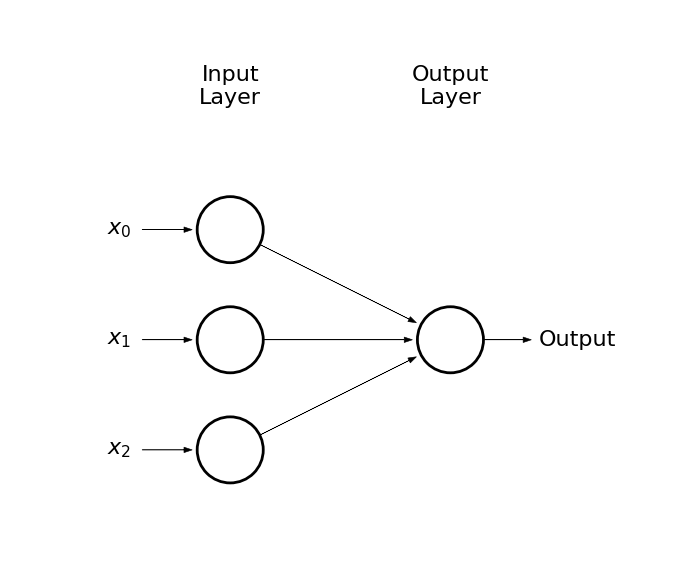

In [ ]:
draw_net(3, 1)

## Caso de Personas Sanas/Enfermas
Síntomas:
- Mareos ($X_1$)
- Dolor muscular ($X_2$)
- Fiebre ($X_3$)

Clase (diagnóstico) ($Y$):
- Sana
- Enferma

$$
X = \{X_1, X_2, X_3\}
$$

donde cada feature es binario:

$X_1 = \{\text{No tiene mareos}, \text{Tiene mareos}\} = \{0, 1\}$

$X_2 = \{\text{No tiene dolor}, \text{Tiene dolor}\} = \{0,1 \}$

$X_3 = \{\text{No tiene fiebre}, \text{Tiene fiebre}\} = \{0, 1\}$

$Y = \{\text{Sano}, \text{Enfermo}\} = \{0, 1\}$

### Construcción del dataset de entrenamiento

ID | Mareos | Dolor muscular | Fiebre | Estado
--- | --- | --- | --- | ---
1 | No | No | Sí | Enfermo
2 | Sí | No | No | Sano
3 | No | Sí | No | Sano
4 | Sí | Sí | Sí | Enfermo
5 | No | Sí | Sí | Enfermo

Convertimos nuestro dataset de entrenamiento a vectores numéricos.
Este es nuestro dataset de entrenamiento $d_{ent}$:

ID | $X_1$ | $X_2$ | $X_3$ | Y
--- | --- | --- | --- | ---
1 | 0 | 0 | 1 | 1
2 | 1 | 0 | 0 | 0
3 | 0 | 1 | 0 | 0 
4 | 1 | 1 | 1 | 1 
5 | 0 | 1 | 1 | 1

## Construcción del dataset de test

ID | Mareos | Dolor muscular | Fiebre | Estado | RNA
--- | --- | --- | --- | --- | ---
1 | Sí | No | Sí | Enfermo | ?
2 | No | No | No | Sano | ?


Si convertimos nuestro datase de test a vectores numéricos. Este es nuestro dataset de test $d_{test}$:

ID | $X_1$ | $X_2$ | $X_3$ | Y
--- | --- | --- | --- | ---
1 | 1 | 0 | 1 | 1
2 | 0 | 0 | 0 | 0

tenemos que $d_{ent}\cap d_{test} = \emptyset$

In [ ]:
# Dataset de entrenamiento
d_ent = [
         {'X':[0,0,1], 'Y':1}, #ID 1
         {'X':[1,0,0], 'Y':0}, #ID 2
         {'X':[0,1,0], 'Y':0}, #ID 3
         {'X':[1,1,1], 'Y':1}, #ID 4
         {'X':[0,1,1], 'Y':1}, #ID 1
]

In [ ]:
print(d_ent)

[{'X': [0, 0, 1], 'Y': 1}, {'X': [1, 0, 0], 'Y': 0}, {'X': [0, 1, 0], 'Y': 0}, {'X': [1, 1, 1], 'Y': 1}, {'X': [0, 1, 1], 'Y': 1}]


In [ ]:
for ejemplo in d_ent:
  print(ejemplo)

{'X': [0, 0, 1], 'Y': 1}
{'X': [1, 0, 0], 'Y': 0}
{'X': [0, 1, 0], 'Y': 0}
{'X': [1, 1, 1], 'Y': 1}
{'X': [0, 1, 1], 'Y': 1}


In [ ]:
tam = len(d_ent)
print("X\t\tY")
for i in range(tam):
  X = d_ent[i]['X']
  Y = d_ent[i]['Y']
  print("{}\t{}".format(X,Y))

X		Y
[0, 0, 1]	1
[1, 0, 0]	0
[0, 1, 0]	0
[1, 1, 1]	1
[0, 1, 1]	1


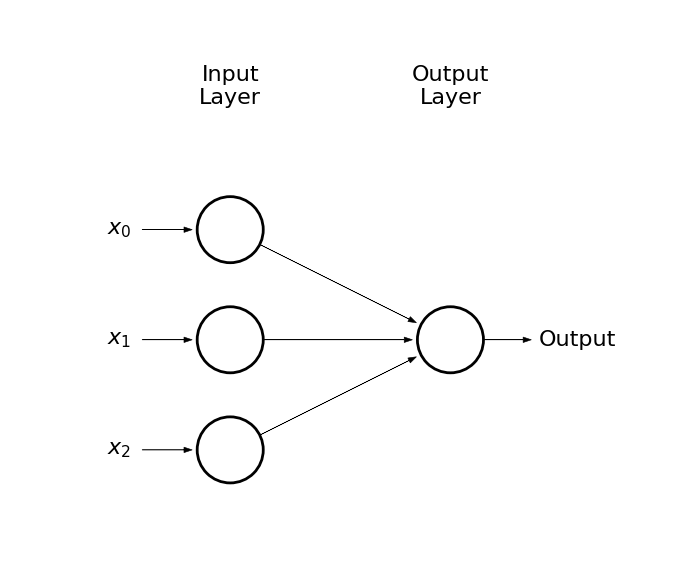

In [ ]:
draw_net(3,1)

## Construcción de RNA: Pesos

$W = \{w_0, w_1, w_2\}$

In [ ]:
import math
import random

u = random.uniform(-1,1)
print(u)

0.7055312887861607


In [ ]:
print(random.uniform(-1,1))

print(random.uniform(-1,1))

-0.48663235285591555
0.07880538902906697


In [ ]:
w0 = random.uniform(-1,1)
w1 = random.uniform(-1,1)
w2 = random.uniform(-1,1)

W = [w0, w1, w2]
print(W)

[0.3706589673199081, -0.5940060694758718, -0.3409712453022815]


## Ensamble 1: ensamblando los pesos en la RNA

In [ ]:
class Neurona():
  def __init__(self):
    w0 = random.uniform(-1,1)
    w1 = random.uniform(-1,1)
    w2 = random.uniform(-1,1)
    self.W = [w0, w1, w2]

## Sumatoria ($\sum$) de pesos versus entradas

$$
\sum_{i} w_i \times X_i
$$

En este caso particular, tendríamos:
$$
\sum_{i} w_i \times X_i = w_1 \times X_1 + w_2 \times X_2 + w_3 \times X_3 
$$

In [ ]:
for indice, Xi in enumerate(d_ent[0]['X']):
  print("Indice={}\tXi={}".format(indice, Xi))

Indice=0	Xi=0
Indice=1	Xi=0
Indice=2	Xi=1


## Ensamble 2: ensamblando la función sumatoria en la RNA


In [ ]:
class Neurona():
  def __init__(self):
    w0 = random.uniform(-1,1)
    w1 = random.uniform(-1,1)
    w2 = random.uniform(-1,1)
    self.W = [w0, w1, w2]

  def __sumatoria(self, X):
    suma = 0
    for i, x in enumerate(X):
      suma += self.W[i]*x
    return suma  

## Construcción de la Función de Activación
En este caso, usaremos la función sigmoidal, la cual se basa en el valor de Euler:

In [ ]:
from math import e
print(e)

2.718281828459045


La función sigmoide:
$$
\phi(z) = \frac{1}{1+e^{-z}}
$$

In [ ]:
import math 
def sigmoide(x):
  a = []
  for z in x:
    a.append(1/(1+math.exp(-z)))
  return a  

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(-5., 5., 0.2)
sig = sigmoide(x)

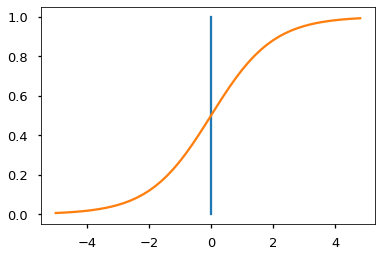

In [ ]:
#Graficamos
Yaxis_linea = np.linspace(0,1,2)
Xaxis_linea = [0]*len(Yaxis_linea)
plt.plot(Xaxis_linea, Yaxis_linea)

plt.plot(x,sig)
plt.show()

### Función de activación:
$$
FA = \frac{1}{1+e^{-\sum w_i x_i}}
$$

Otras funciones de activación:


In [ ]:
def binario(x): return 0 if x < 0 else 1
def identidad(x): return x
def tanh(x): return math.tanh(x)
def logistica(x): return 1/(1+math.exp(-x))
def relu(x): return 0 if x<0 else x

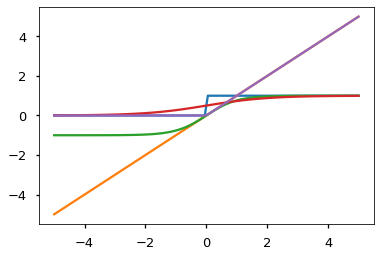

In [ ]:
x = np.linspace(-5,5,100)
bs = [binario(i) for i in x]
ident = [identidad(i) for i in x]
tn = [tanh(i) for i in x]
lg = [logistica(i) for i in x]
rl = [relu(i) for i in x]

plt.plot(x, bs)
plt.plot(x, ident)
plt.plot(x, tn)
plt.plot(x, lg)
plt.plot(x, rl)

### Ensambe 3: ensamblando la función de activación en la RNA

In [ ]:
class Neurona():
  def __init__(self):
    w0 = random.uniform(-1,1)
    w1 = random.uniform(-1,1)
    w2 = random.uniform(-1,1)
    self.W = [w0, w1, w2]

  def __sumatoria(self, X):
    suma = 0
    for i, x in enumerate(X):
      suma += self.W[i]*x
    return suma  

  def __sigmoide(self,suma):
    return 1/(1+math.exp(-suma))
    

### Ensamble 4: ensamblando la función "predict()" (Fase Test)

In [ ]:
class Neurona():
  def __init__(self):
    w0 = random.uniform(-1,1)
    w1 = random.uniform(-1,1)
    w2 = random.uniform(-1,1)
    self.W = [w0, w1, w2]

  def __sumatoria(self, X):
    suma = 0
    for i, x in enumerate(X):
      suma += self.W[i]*x
    return suma  

  def __sigmoide(self,suma):
    return 1/(1+math.exp(-suma))
    
  def predict(self, X):
    suma = self.__sumatoria(X)
    y_proba = self.__sigmoide(suma)
    return y_proba

### Ensamble 5: ensamblando la función "fit()" (Fase Entrenamiento)

In [ ]:
class Neurona():
  def __init__(self):
    w0 = random.uniform(-1,1)
    w1 = random.uniform(-1,1)
    w2 = random.uniform(-1,1)
    self.W = [w0, w1, w2]

  def __sumatoria(self, X):
    suma = 0
    for i, x in enumerate(X):
      suma += self.W[i]*x
    return suma  

  def __sigmoide(self,suma):
    return 1/(1+math.exp(-suma))
    
  def predict(self, X):
    suma = self.__sumatoria(X)
    y_proba = self.__sigmoide(suma)
    return y_proba

  def fit(self, d_ent, epocas):
    for epoca in range(epocas):
      for ejemplo in d_ent:
        X = ejemplo['X']
        y_real = ejemplo['Y']
        y_proba = self.predict(X)
        error = y_real - y_proba

## Ensamble 6: ensamblando la gradiente 
$$
Gradiente = y_{proba}\times (1-y_{proba})
$$

In [ ]:
def gradiente(proba):
  return proba*(1-proba)

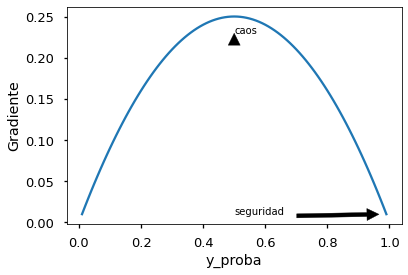

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
p = np.arange(0.01, 1.0, 0.01)
plt.xlabel('y_proba')
plt.ylabel('Gradiente')
plt.annotate('caos', xy=(0.5,0.23), xytext=(0.5,0.23), arrowprops=dict(facecolor='black', shrink=0.1))
plt.annotate('seguridad', xy=(1,0.01), xytext=(0.5,0.01), arrowprops=dict(facecolor='black', shrink=0.1))
plt.plot(p,gradiente(p));


In [ ]:
class Neurona():
  def __init__(self):
    w0 = random.uniform(-1,1)
    w1 = random.uniform(-1,1)
    w2 = random.uniform(-1,1)
    self.W = [w0, w1, w2]

  def __sumatoria(self, X):
    suma = 0
    for i, x in enumerate(X):
      suma += self.W[i]*x
    return suma  

  def __sigmoide(self,suma):
    return 1/(1+math.exp(-suma))
    
  def predict(self, X):
    suma = self.__sumatoria(X)
    y_proba = self.__sigmoide(suma)
    return y_proba

  def fit(self, d_ent, epocas):
    for epoca in range(epocas):
      for ejemplo in d_ent:
        X = ejemplo['X']
        y_real = ejemplo['Y']
        y_proba = self.predict(X)
        error = y_real - y_proba

  def __gradiente(self, y_proba):
    return y_proba*(1-y_proba)
    

### Ensamble 7: ajuste de los pesos de la neurona



In [ ]:
class Neurona():
  def __init__(self):
    w0 = random.uniform(-1,1)
    w1 = random.uniform(-1,1)
    w2 = random.uniform(-1,1)
    self.W = [w0, w1, w2]

  def __sumatoria(self, X):
    suma = 0
    for i, x in enumerate(X):
      suma += self.W[i]*x
    return suma  

  def __sigmoide(self,suma):
    return 1/(1+math.exp(-suma))
    
  def predict(self, X):
    suma = self.__sumatoria(X)
    y_proba = self.__sigmoide(suma)
    return y_proba

  def fit(self, d_ent, epocas):
    for epoca in range(epocas):
      for ejemplo in d_ent:
        X = ejemplo['X']
        y_real = ejemplo['Y']
        y_proba = self.predict(X)
        error = y_real - y_proba
        #Aplicamos la gradiente para ajuste de los pesos
        for indice in range(len(self.W)):
          xi = X[indice]
          self.W[indice] = self.W[indice] + xi*error*self.__gradiente(y_proba)

  def __gradiente(self, y_proba):
    return y_proba*(1-y_proba)
    

Probando nuestra neurona:

In [ ]:
# Dataset de entrenamiento
d_ent = [
         {'X':[0,0,1], 'Y':1}, #ID 1
         {'X':[1,0,0], 'Y':0}, #ID 2
         {'X':[0,1,0], 'Y':0}, #ID 3
         {'X':[1,1,1], 'Y':1}, #ID 4
         {'X':[0,1,1], 'Y':1}, #ID 1
]

In [ ]:
#Fase de entrenamiento
num_epocas = 2
neurona1 = Neurona()
neurona1.fit(d_ent, num_epocas)


In [ ]:
# Dataset de test
d_test = [
         {'X':[1,0,1], 'Y':1}, #ID 1
         {'X':[0,0,0], 'Y':0} #ID 2
]

$d_{test}$:

ID | $X_1$ | $X_2$ | $X_3$ | Y
--- | --- | --- | --- | ---
1 | 1 | 0 | 1 | 1
2 | 0 | 0 | 0 | 0

In [ ]:
#Fase de test
print("y_proba\ty_pred\ty_real")
for ejemplo_test in d_test:
  X = ejemplo_test['X']
  y_real = ejemplo_test['Y']
  y_proba = neurona1.predict(X)
  print("{:.3f}\t{:.0f}\t{}".format(y_proba, y_proba, y_real))

y_proba	y_pred	y_real
0.505	1	1
0.500	0	0


¿$y_{proba} = 0.5$ es **sano** ó **enfermo**?

##Ensamble 8: inclusión del bias en la neurona


In [ ]:
class Neurona():
  def __init__(self):
    w0 = random.uniform(-1,1)
    w1 = random.uniform(-1,1)
    w2 = random.uniform(-1,1)
    self.W = [w0, w1, w2]
    self.bias = random.uniform(-1,1)

  def __sumatoria(self, X):
    suma = 0
    for i, x in enumerate(X):
      suma += self.W[i]*x
    return suma  

  def __sigmoide(self,suma):
    return 1/(1+math.exp(-suma))
    
  def predict(self, X):
    suma = self.__sumatoria(X)
    y_proba = self.__sigmoide(suma) + self.bias
    return y_proba

  def fit(self, d_ent, epocas):
    for epoca in range(epocas):
      for ejemplo in d_ent:
        X = ejemplo['X']
        y_real = ejemplo['Y']
        y_proba = self.predict(X)
        error = y_real - y_proba
        #Aplicamos la gradiente para ajuste de los pesos
        for indice in range(len(self.W)):
          xi = X[indice]
          self.W[indice] = self.W[indice] + xi*error*self.__gradiente(y_proba)
        self.bias += error*self.__gradiente(y_proba)

  def __gradiente(self, y_proba):
    return y_proba*(1-y_proba)
    

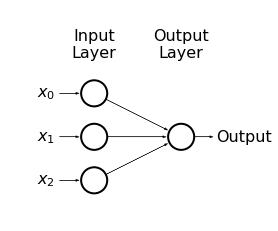

In [ ]:
draw_net(3,1)

## Revisando la recta de la neurona:
Si asumimos que tenemos solo 2 features, tendríamos entonces:
$$
w_1 \times X_1 + w_2 \times X_2 + \theta = 0
$$

En dos dimensiones, nuestro hiperplano es una recta:
$$
X_2 = -\frac{w_1}{w_2}X_1-\frac{\theta}{w_2}
$$

donde:
- pendiente: $-\frac{w_1}{w_2}$
- intercepto: $-\frac{\theta}{w_2}$

Para poder evaluar mejor esta situación, reduzcamos el número de features a 2.


In [ ]:
# Dataset de entrenamiento
d_ent = [
         {'X':[0,1], 'Y':1}, #ID 1
         {'X':[1,0], 'Y':0}, #ID 2
         {'X':[0,0], 'Y':0}, #ID 3
         {'X':[1,1], 'Y':1}, #ID 4
         {'X':[0,1], 'Y':1}, #ID 1
]

In [ ]:
class Neurona():
  def __init__(self):
    w0 = random.uniform(-1,1)
    w1 = random.uniform(-1,1)
    self.W = [w0, w1]
    self.bias = random.uniform(-1,1)

  def __sumatoria(self, X):
    suma = 0
    for i, x in enumerate(X):
      suma += self.W[i]*x
    return suma  

  def __sigmoide(self,suma):
    return 1/(1+math.exp(-suma))
    
  def predict(self, X):
    suma = self.__sumatoria(X)
    y_proba = self.__sigmoide(suma) + self.bias
    return y_proba

  def fit(self, d_ent, epocas):
    for epoca in range(epocas):
      for ejemplo in d_ent:
        X = ejemplo['X']
        y_real = ejemplo['Y']
        y_proba = self.predict(X)
        error = y_real - y_proba
        #Aplicamos la gradiente para ajuste de los pesos
        for indice in range(len(self.W)):
          xi = X[indice]
          self.W[indice] = self.W[indice] + xi*error*self.__gradiente(y_proba)
        self.bias += error*self.__gradiente(y_proba)

  def __gradiente(self, y_proba):
    return y_proba*(1-y_proba)
    

In [ ]:
neurona2 = Neurona()
neurona2.fit(d_ent, 2)

In [ ]:
# Dataset de test
d_test = [
         {'X':[1,1], 'Y':1}, #ID 1
         {'X':[0,0], 'Y':0} #ID 2
]

In [ ]:
#Fase de test
print("y_proba\ty_pred\ty_real")
for ejemplo_test in d_test:
  X = ejemplo_test['X']
  y_real = ejemplo_test['Y']
  y_proba = neurona2.predict(X)
  print("{:.3f}\t{:.0f}\t{}".format(y_proba, y_proba, y_real))

y_proba	y_pred	y_real
0.859	1	1
1.068	1	0


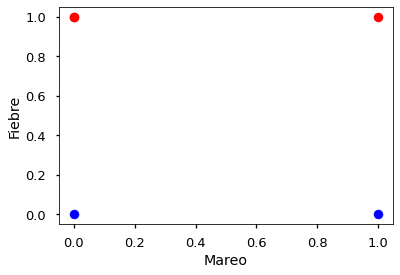

In [ ]:
# Dataset de entrenamiento
d_ent = [
         {'X':[0,1], 'Y':1}, #ID 1
         {'X':[1,0], 'Y':0}, #ID 2
         {'X':[0,0], 'Y':0}, #ID 3
         {'X':[1,1], 'Y':1}, #ID 4
         {'X':[0,1], 'Y':1}, #ID 1
]

plt.xlabel("Mareo")
plt.ylabel("Fiebre")
plt.scatter([0,1,0 ],[1,1,1 ], color='r')
plt.scatter([1,0 ],[0,0 ], color='b')

In [ ]:
neurona2 = Neurona()
pesso_antiguos = neurona2.W.copy()
bias_antiguo = neurona2.bias
neurona2.fit(d_ent, 2)
print("Antiguos pesos:", pesso_antiguos)
print("Nuevos pesos:", neurona2.W)
print("Bias antiguo: ", bias_antiguo)
print("Bias nuevo: ", neurona2.bias)

Antiguos pesos: [0.24982691872791118, 0.861289873430356]
Nuevos pesos: [0.14281431549444967, 1.1948018558803117]
Bias antiguo:  0.2061263849638768
Bias nuevo:  0.0044007223323113825


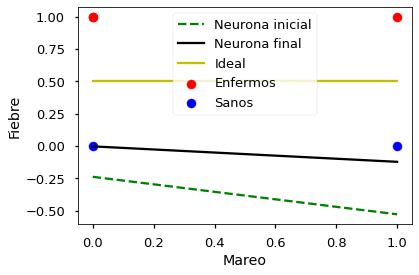

In [ ]:
plt.xlabel("Mareo")
plt.ylabel("Fiebre")
plt.scatter([0,1,0 ],[1,1,1 ], color='r', label='Enfermos')
plt.scatter([1,0 ],[0,0 ], color='b', label='Sanos')

m, b = -1*(pesso_antiguos[0]/pesso_antiguos[1]), -1*(bias_antiguo/pesso_antiguos[1])
x = np.linspace(0,1,10)
plt.plot(x, x*m+b, '--', color='g', label='Neurona inicial')

m, b = -1*(neurona2.W[0]/neurona2.W[1]), -1*(neurona2.bias/neurona2.W[1])
x = np.linspace(0,1,10)
plt.plot(x, x*m+b, color='k', label='Neurona final')

plt.plot(x, [0.5]*len(x), color='y', label='Ideal')

plt.legend()


## Un caso de aplicación con Redes Neuronales


In [ ]:
import io
import pandas as pd
from google.colab import files
subido = files.upload()
pima = pd.read_csv(io.BytesIO(subido['diabetes.csv']))



Saving diabetes.csv to diabetes.csv


In [ ]:
pima.head()

Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Class
0            1       85             66  ...                     0.351   31      0
1            8      183             64  ...                     0.672   32      1
2            1       89             66  ...                     0.167   21      0
3            0      137             40  ...                     2.288   33      1
4            5      116             74  ...                     0.201   30      0

[5 rows x 9 columns]

In [ ]:
X = pima.iloc[:,0:8]
Y = pima.iloc[:,8]

from sklearn.preprocessing import StandardScaler
estandarizacion = StandardScaler().fit_transform(X)
X2 = pd.DataFrame(data=estandarizacion, columns=X.columns)
X2.head()

Pregnancies   Glucose  ...  DiabetesPedigreeFunction       Age
0    -0.843726 -1.122086  ...                 -0.364265 -0.188940
1     1.234240  1.944476  ...                  0.604701 -0.103795
2    -0.843726 -0.996920  ...                 -0.919684 -1.040393
3    -1.140579  0.505069  ...                  5.482732 -0.018650
4     0.343683 -0.152051  ...                 -0.817052 -0.274086

[5 rows x 8 columns]

Neurona:

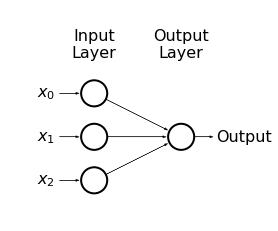

In [ ]:
draw_net(3,1)

In [ ]:
from google.colab import data_table
data_table.DataTable(X2)

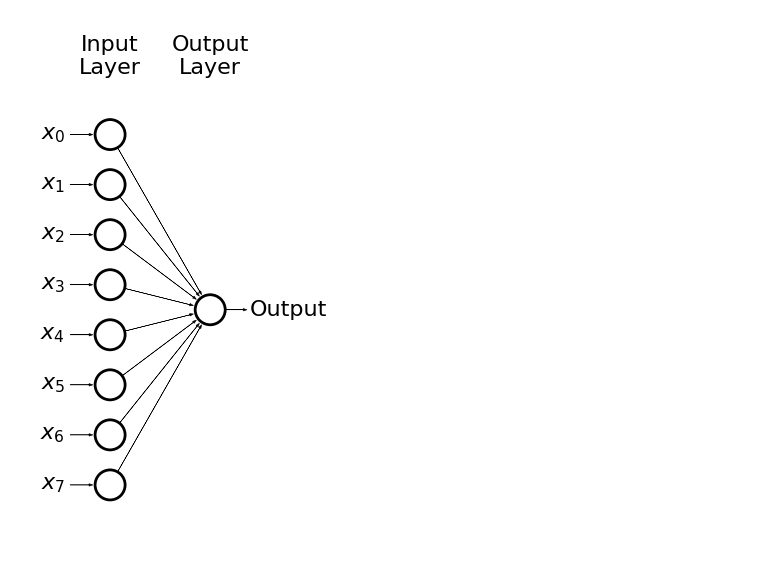

In [ ]:
draw_net(8,1, w=15, h=10)

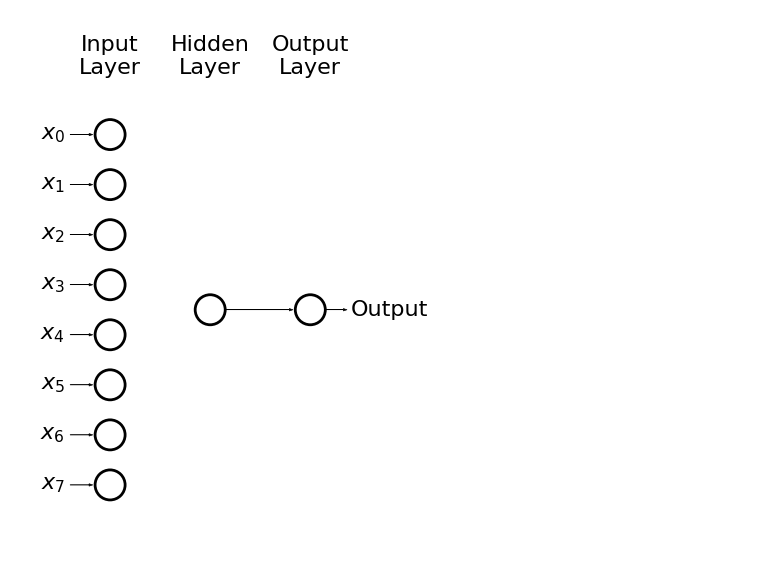

In [ ]:
draw_net(8,1,[1], w=15, h=10)

## Comprendiendo mejor nuestra arquitectura de RNA

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X2, Y, test_size=0.2)

In [ ]:
red_neuronal1 = MLPClassifier(hidden_layer_sizes=(1,), max_iter=1, learning_rate_init=0.3, activation='logistic')
red_neuronal1.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(1,), learning_rate='constant',
              learning_rate_init=0.3, max_fun=15000, max_iter=1, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [ ]:
red_neuronal1.coefs_

[array([[-1.3794701 ],
        [-0.71309196],
        [-0.84848491],
        [-0.04103717],
        [-0.71768651],
        [-1.20700937],
        [-0.99076276],
        [-1.45749807]]), array([[-1.49903808]])]

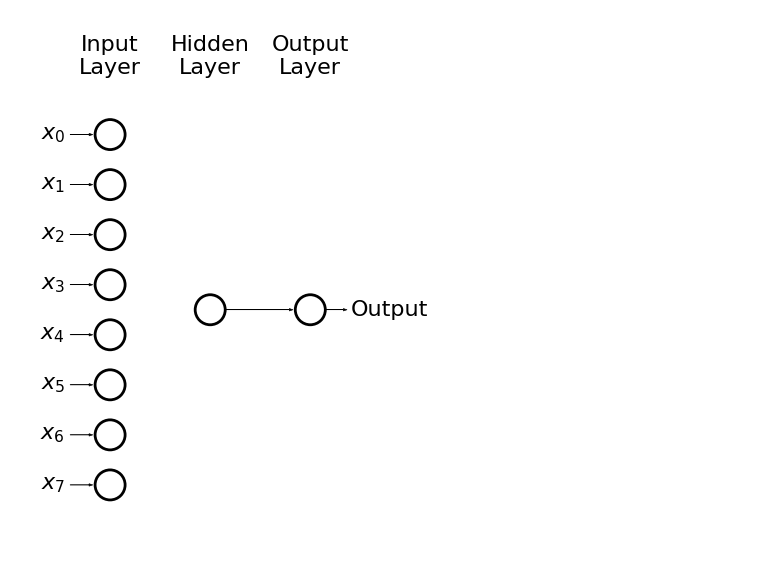

In [ ]:
draw_net(8,1,[1], w=15, h=10)

In [ ]:
red_neuronal1.intercepts_

[array([-0.41545812]), array([0.60029642])]

### Probando su desempeño

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k=10
kfold = KFold(n_splits = k)
cv_resultado1 = cross_val_score(red_neuronal1, X_train, Y_train, cv=kfold, scoring='f1_macro')
print(cv_resultado1)

[0.39805825 0.42056075 0.39805825 0.37113402 0.7218845  0.41346154
 0.37755102 0.37755102 0.37113402 0.40776699]


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/loc

In [ ]:
for i in range(len(cv_resultado1)):
  print("F1 en {} fold = {:.2f}".format(i+1, cv_resultado1[i]))

F1 en 1 fold = 0.40
F1 en 2 fold = 0.42
F1 en 3 fold = 0.40
F1 en 4 fold = 0.37
F1 en 5 fold = 0.72
F1 en 6 fold = 0.41
F1 en 7 fold = 0.38
F1 en 8 fold = 0.38
F1 en 9 fold = 0.37
F1 en 10 fold = 0.41


In [ ]:
import numpy as np
promedio = np.mean(cv_resultado1)
print("promedio: ", promedio)

promedio:  0.4257160361804404


{'boxes': [<matplotlib.lines.Line2D at 0x7ff6e3c9b9e8>],
 'caps': [<matplotlib.lines.Line2D at 0x7ff6e3d0c470>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff6e3d0c518>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7ff6e3d0c8d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7ff6e3c9b198>,
  <matplotlib.lines.Line2D at 0x7ff6e3c9bd68>]}

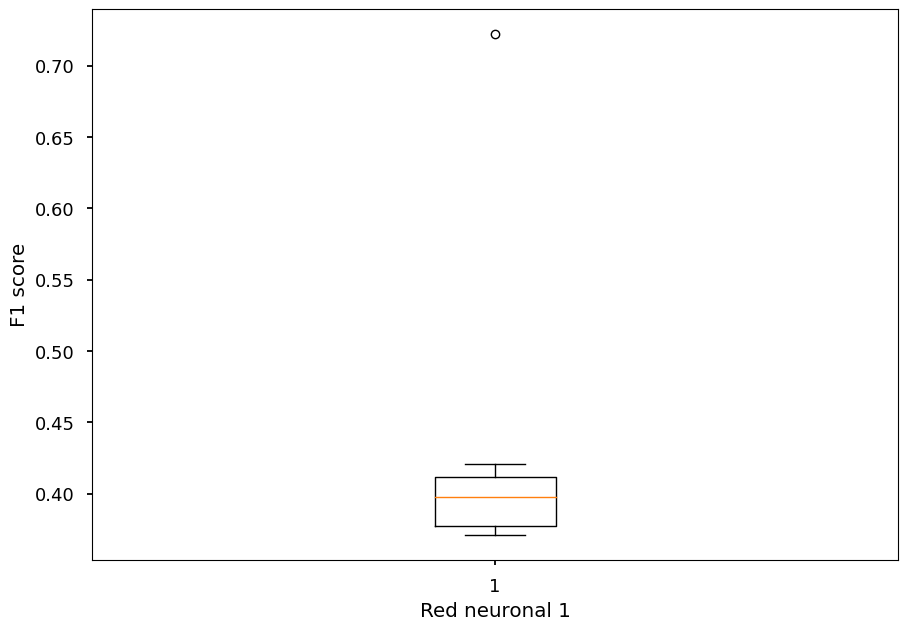

In [ ]:
plt.xlabel('Red neuronal 1')
plt.ylabel('F1 score')
plt.boxplot(cv_resultado1)

## Construyamos otra red neuronal

In [ ]:
red_neuronal2 = MLPClassifier(hidden_layer_sizes=(8,), max_iter=10, learning_rate_init=0.1, activation='logistic')
red_neuronal2.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(8,), learning_rate='constant',
              learning_rate_init=0.1, max_fun=15000, max_iter=10, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [ ]:
red_neuronal2.coefs_

[array([[-0.68423026,  0.17656424,  0.06044429,  0.28466719,  0.24288988,
          0.05044081, -0.64785158, -0.11983387],
        [-2.48167052,  1.63757932, -2.15249379,  2.20257282,  1.55780409,
          1.5961099 , -1.76384665, -1.5071903 ],
        [ 0.18478991,  0.18987009,  0.56331463, -0.59408198,  0.25322099,
         -0.0047816 ,  0.86956004,  0.22312363],
        [ 0.28108221,  0.37282162,  0.30838087, -0.08182556,  0.86079995,
          0.3642728 , -0.0634191 , -0.0063362 ],
        [ 0.78219724,  0.27293238,  0.31159362, -0.58841756,  0.88649273,
          0.02820225,  0.44782527, -0.34954829],
        [-0.15556655,  1.31513178, -1.3323564 ,  0.55661954,  0.80871695,
          0.98714687, -0.71704745, -1.1487968 ],
        [-0.17904335,  0.69177249, -0.69394179,  0.36392831,  0.74537555,
          0.77423515,  0.04371959, -0.6695852 ],
        [-1.77011295,  0.4341218 , -0.90272708,  0.46792723, -0.39303567,
          0.4206447 , -1.3223602 , -0.61857397]]), array([[-1.091

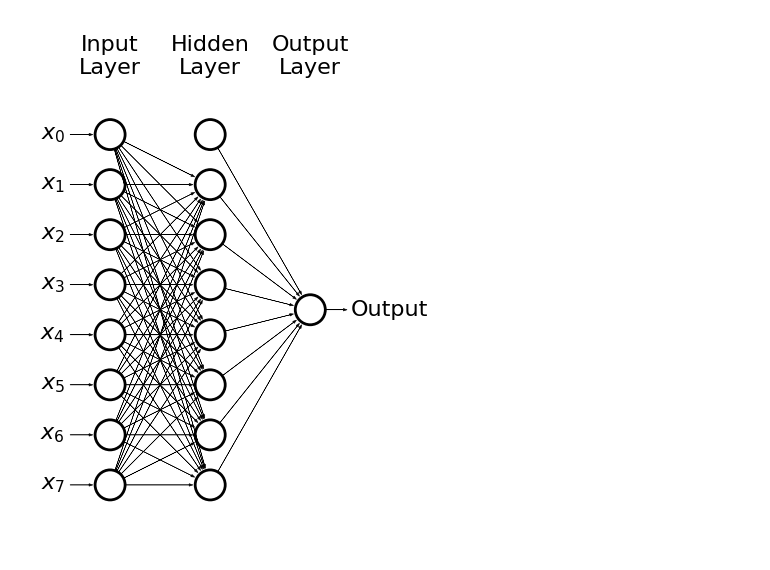

In [ ]:
draw_net(8,1,[8],w=15, h=10)

### Evaluando el desempeño

In [ ]:
k = 10
cv_resultado2 = cross_val_score(red_neuronal2, X_train, Y_train, cv=kfold, scoring='f1_macro')


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr

In [ ]:
for i in range(len(cv_resultado2)):
  print("Fold[{}] = {:.2f} (f-measure)".format(i+1, cv_resultado2[i]))

Fold[1] = 0.76 (f-measure)
Fold[2] = 0.65 (f-measure)
Fold[3] = 0.84 (f-measure)
Fold[4] = 0.62 (f-measure)
Fold[5] = 0.78 (f-measure)
Fold[6] = 0.76 (f-measure)
Fold[7] = 0.73 (f-measure)
Fold[8] = 0.75 (f-measure)
Fold[9] = 0.68 (f-measure)
Fold[10] = 0.78 (f-measure)


In [ ]:
promedio2 = np.mean(cv_resultado2)
print("Promedio2: ", promedio2)

Promedio2:  0.7351326322389636


# Comparación de Arquitecturas de RNAs

ID | capas escondidas | épocas | tasa aprendizaje | $\alpha$ | F1 (10-fold cv)
--- | --- | --- | --- | --- | ---
1 | (1) | 1 | 0.3 |  | 0.426
2 | (8) | 10 | 0.1 |  | 0.735
3 | (1) | 1000 | 0.001 |  | 0.679
4 | (8) | 1000 | 0.001 |  | 0.718
5 | (8) | 100000 | 0.1 |  | 0.687
51 | (8) | 100000 | 0.1 | 1.0 | 0.72

In [ ]:
red_neuronal3 = MLPClassifier(hidden_layer_sizes=(1,), max_iter=1000, learning_rate_init=0.001, activation='logistic')
cv_resultado3 = cross_val_score(red_neuronal3, X_train, Y_train, cv=kfold, scoring='f1_macro')

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
promedio3 = np.mean(cv_resultado3)
print("promedio3: ", promedio3)

promedio3:  0.6797507438977581


In [ ]:
red_neuronal4 = MLPClassifier(hidden_layer_sizes=(8,), max_iter=1000, learning_rate_init=0.001, activation='logistic')
cv_resultado4 = cross_val_score(red_neuronal4, X_train, Y_train, cv=kfold, scoring='f1_macro')
promedio4 = np.mean(cv_resultado4)

In [ ]:
print("promedio4: ", promedio4)

promedio4:  0.7181902438989824


In [ ]:
red_neuronal5 = MLPClassifier(hidden_layer_sizes=(8,), max_iter=100000, learning_rate_init=0.1, activation='logistic')
cv_resultado5 = cross_val_score(red_neuronal5, X_train, Y_train, cv=kfold, scoring='f1_macro')
promedio5 = np.mean(cv_resultado5)
print("promedio5: ", promedio5)

promedio5:  0.6870798732857277


In [ ]:
red_neuronal5.fit(X_train, Y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(8,), learning_rate='constant',
              learning_rate_init=0.1, max_fun=15000, max_iter=100000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
red_neuronal5.coefs_

[array([[-0.29693396,  1.3532087 ,  0.9997332 , -4.57884434,  2.28666741,
          2.42731416,  0.06879202, -0.40740897],
        [-4.08563255,  2.65983681, -2.48668345,  1.28248079, -3.12755285,
          1.20052028,  3.92680788, -2.9898396 ],
        [-0.77916511,  2.06245556,  2.79962955, -0.32598759,  1.62894433,
          1.05847114,  1.14217095,  2.21281499],
        [-0.15283542,  1.41817505, -0.42681371,  0.34383036,  0.83284968,
          0.21074906, -4.18463935, -3.31478414],
        [-0.87011726,  3.69614078, -0.46808757, -1.51592419, -1.44730965,
          2.13922988, -3.97508352,  1.69527878],
        [-4.64603255,  3.5595566 ,  3.44858728, -6.49888598, -2.43976888,
          2.40396225, -1.11914997, -0.44174172],
        [ 0.78107898,  2.34314429, -2.51882785,  3.03690948, -3.94697768,
          0.68022377,  0.73820963, -1.28499115],
        [ 2.5932    , -1.96117117, -3.52068017,  5.00805512, -4.05101796,
         -2.93142003,  4.4636946 , -4.62703781]]), array([[-1.389

In [ ]:
pesos_5 = [z for x in red_neuronal5.coefs_ for y in x for z in y]
for i in range(len(pesos_5)):
  print("Peso[{}] = {}".format(i+1, pesos_5[i]))

Peso[1] = -0.29693396056694377
Peso[2] = 1.3532086961072356
Peso[3] = 0.9997332044278469
Peso[4] = -4.5788443434729835
Peso[5] = 2.2866674118795465
Peso[6] = 2.427314156924164
Peso[7] = 0.06879201864306493
Peso[8] = -0.40740896884771954
Peso[9] = -4.085632549652585
Peso[10] = 2.6598368095506757
Peso[11] = -2.4866834502344926
Peso[12] = 1.282480793272895
Peso[13] = -3.1275528535847847
Peso[14] = 1.200520280915851
Peso[15] = 3.9268078768751247
Peso[16] = -2.98983960310357
Peso[17] = -0.77916511310831
Peso[18] = 2.062455560902549
Peso[19] = 2.799629546186314
Peso[20] = -0.3259875910049
Peso[21] = 1.6289443300095514
Peso[22] = 1.0584711425835571
Peso[23] = 1.1421709530588533
Peso[24] = 2.212814992463763
Peso[25] = -0.1528354234919333
Peso[26] = 1.4181750469526686
Peso[27] = -0.4268137124741527
Peso[28] = 0.34383036323204297
Peso[29] = 0.8328496818437611
Peso[30] = 0.21074905635833238
Peso[31] = -4.184639352744766
Peso[32] = -3.3147841413485204
Peso[33] = -0.8701172631850098
Peso[34] = 3.69

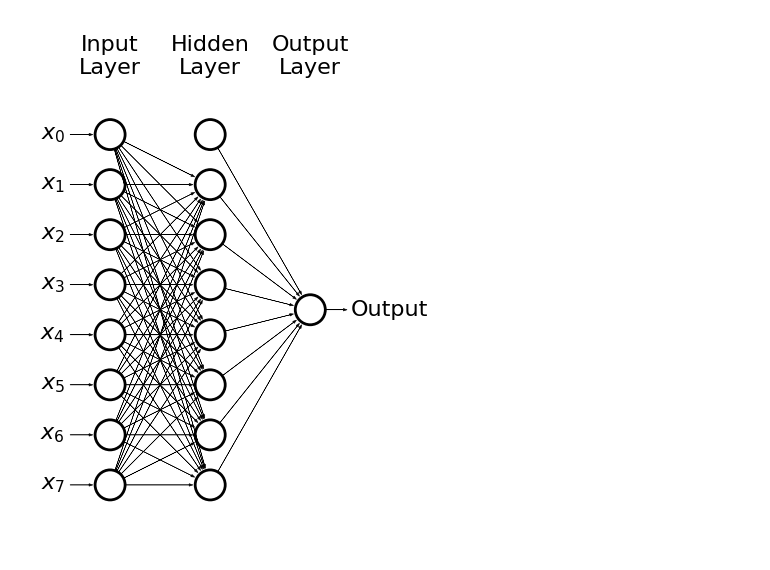

In [ ]:
draw_net(8,1,[8], w=15, h=10)

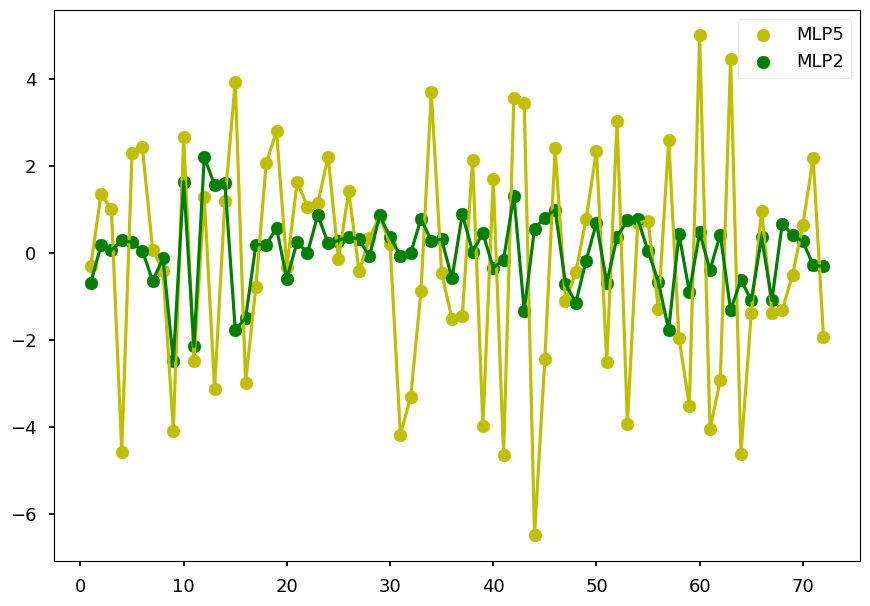

In [ ]:
pesos_2 = [z for x in red_neuronal2.coefs_ for y in x for z in y]

x = np.linspace(1,len(pesos_5),len(pesos_5))
plt.scatter(x,pesos_5, color='y', label='MLP5')
plt.plot(x,pesos_5, color='y')

plt.scatter(x,pesos_2, color='g', label='MLP2')
plt.plot(x,pesos_2, color='g')
plt.legend()

# Regularización de Pesos en la RNA

In [ ]:
red_neuronal51 = MLPClassifier(hidden_layer_sizes=(8,), max_iter=100000, learning_rate_init=0.1, activation='logistic', alpha=1.0)
cv_resultado51 = cross_val_score(red_neuronal51, X_train, Y_train, cv=kfold, scoring='f1_macro')
promedio51 = np.mean(cv_resultado51)
print("promedio51: ", promedio51)

promedio51:  0.723338805744533


In [ ]:
red_neuronal51.fit(X_train, Y_train)
pesos_51 = [z for x in red_neuronal51.coefs_ for y in x for z in y]

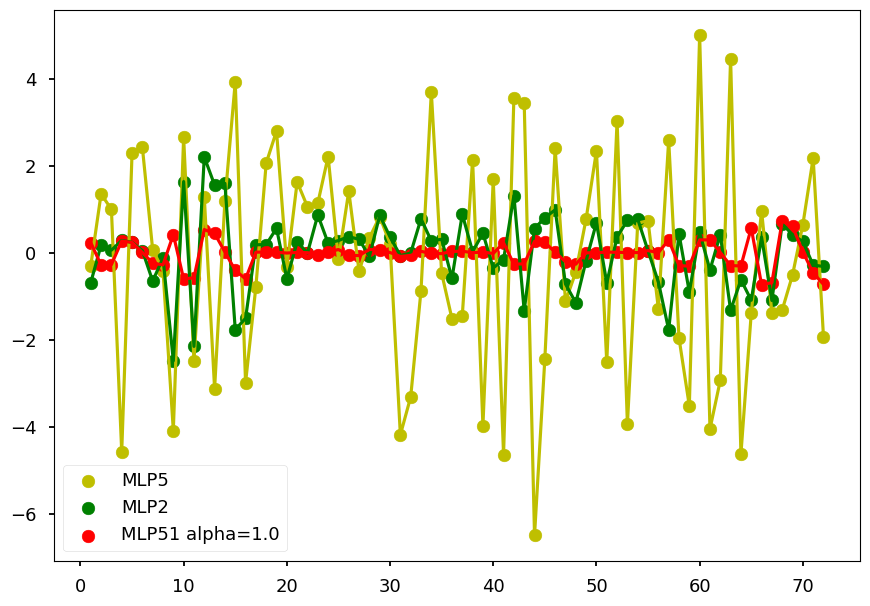

In [ ]:
x = np.linspace(1,len(pesos_5),len(pesos_5))
plt.scatter(x,pesos_5, color='y', label='MLP5')
plt.plot(x,pesos_5, color='y')

plt.scatter(x,pesos_2, color='g', label='MLP2')
plt.plot(x,pesos_2, color='g')

plt.scatter(x,pesos_51, color='r', label='MLP51 alpha=1.0')
plt.plot(x,pesos_51, color='r')
plt.legend()

In [ ]:
red_neuronal6 = MLPClassifier(hidden_layer_sizes=(8,8), max_iter=100000, learning_rate_init=0.0001, activation='logistic', alpha=0.7)
cv_resultado6 = cross_val_score(red_neuronal6, X_train, Y_train, cv=kfold, scoring='f1_macro')
promedio6 = np.mean(cv_resultado6)
print("promedio6: ", promedio6)

promedio6:  0.39651824053802354


In [ ]:
red_neuronal6.fit(X_train, Y_train)
pesos_6 = [z for x in red_neuronal6.coefs_ for y in x for z in y]
print(len(pesos_6))

136


In [ ]:
print(len(X_train))

613


# Tablero de Grupos

Grupo | F1-score | Desc.
--- | --- | ---
1 | 0.757 | epocas: 100, aprendizaje: 0.01, (4,8), ReLu
2 | 0.762 | epocas: 200, aprendizaje: 0.01, (100,), Logistic 
3 | 0.727 | epocas: 100, aprendizaje: 0.001, (8,8,8), Logistic 
4 | 0.725 | epocas: 100, aprendizaje: 0.01, (8,2), Logistic
5 | 0.740 | epocas: 100, aprendizaje: 0.001, (8,2), 

# Mapas Auto-organizados (Self-Organized Map - SOM)

In [ ]:
import pandas as pd
from google.colab import files
subido = files.upload()
import io
dataset = pd.read_csv(io.BytesIO(subido['Credit_Card_Applications.csv']))

Saving Credit_Card_Applications.csv to Credit_Card_Applications.csv


In [ ]:
dataset.shape

(690, 16)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
dataset.head()

CustomerID  A1     A2     A3  A4  A5  ...  A10  A11  A12  A13   A14  Class
0    15776156   1  22.08  11.46   2   4  ...    0    1    2  100  1213      0
1    15739548   0  22.67   7.00   2   8  ...    0    0    2  160     1      0
2    15662854   0  29.58   1.75   1   4  ...    0    1    2  280     1      0
3    15687688   0  21.67  11.50   1   5  ...   11    1    2    0     1      1
4    15715750   1  20.17   8.17   2   6  ...   14    0    2   60   159      1

[5 rows x 16 columns]

In [ ]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [ ]:
X

array([[1.5776156e+07, 1.0000000e+00, 2.2080000e+01, ..., 2.0000000e+00,
        1.0000000e+02, 1.2130000e+03],
       [1.5739548e+07, 0.0000000e+00, 2.2670000e+01, ..., 2.0000000e+00,
        1.6000000e+02, 1.0000000e+00],
       [1.5662854e+07, 0.0000000e+00, 2.9580000e+01, ..., 2.0000000e+00,
        2.8000000e+02, 1.0000000e+00],
       ...,
       [1.5675450e+07, 0.0000000e+00, 1.8830000e+01, ..., 2.0000000e+00,
        1.0000000e+02, 1.0000000e+00],
       [1.5776494e+07, 0.0000000e+00, 2.7420000e+01, ..., 2.0000000e+00,
        1.2000000e+02, 1.2000000e+01],
       [1.5592412e+07, 1.0000000e+00, 4.1000000e+01, ..., 1.0000000e+00,
        5.6000000e+02, 1.0000000e+00]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
X = sc.fit_transform(X)
X

array([[8.42681467e-01, 1.00000000e+00, 1.25263158e-01, ...,
        5.00000000e-01, 5.00000000e-02, 1.21200000e-02],
       [6.96090562e-01, 0.00000000e+00, 1.34135338e-01, ...,
        5.00000000e-01, 8.00000000e-02, 0.00000000e+00],
       [3.88981656e-01, 0.00000000e+00, 2.38045113e-01, ...,
        5.00000000e-01, 1.40000000e-01, 0.00000000e+00],
       ...,
       [4.39420332e-01, 0.00000000e+00, 7.63909774e-02, ...,
        5.00000000e-01, 5.00000000e-02, 0.00000000e+00],
       [8.44034934e-01, 0.00000000e+00, 2.05563910e-01, ...,
        5.00000000e-01, 6.00000000e-02, 1.10000000e-04],
       [1.06907888e-01, 1.00000000e+00, 4.09774436e-01, ...,
        0.00000000e+00, 2.80000000e-01, 0.00000000e+00]])

In [ ]:
!pip install minisom

  Created wheel for minisom: filename=MiniSom-2.2.5-cp36-none-any.whl size=8474 sha256=5accc2fd1368ba716dbc5864d05260d4f5f8f796d552400d221a3165bb3d2ea2
  Stored in directory: /root/.cache/pip/wheels/39/5b/16/cc9402ffc58cafb1da6997e5c94b1bde65e8cb214907879fd4
Successfully built minisom


In [ ]:
from minisom import MiniSom

In [ ]:
num_atributos = len(X[0])
som = MiniSom(x=10,y=10, input_len=num_atributos)

In [ ]:
som.random_weights_init(X)

In [ ]:
som.train_random(data=X, num_iteration=100)

In [ ]:
from pylab import bone,pcolor, colorbar, plot, show
bone()

<Figure size 432x288 with 0 Axes>

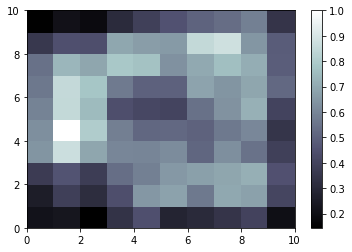

In [ ]:
pcolor(som.distance_map().T)
colorbar()

In [ ]:
marcadores = ['o', 's']
colores = ['r', 'b']
y = dataset.iloc[:,-1].values

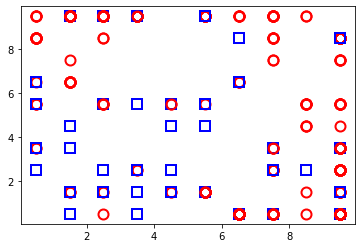

In [ ]:
for i, x in enumerate(X):
  w = som.winner(x)
  plot(w[0]+0.5, w[1]+0.5, marcadores[y[i]], markeredgecolor=colores[y[i]], markerfacecolor='None', markersize=10, markeredgewidth=2)
show()

In [ ]:
y

0

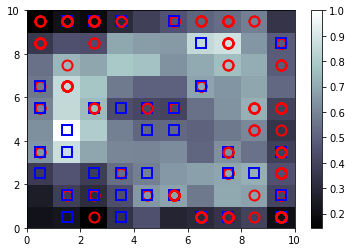

In [ ]:
pcolor(som.distance_map().T)
colorbar()
for i, x in enumerate(X):
  w = som.winner(x)
  plot(w[0]+0.5, w[1]+0.5, marcadores[y[i]], markeredgecolor=colores[y[i]], markerfacecolor='None', markersize=10, markeredgewidth=2)
show()

# K-means

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(300, 2)

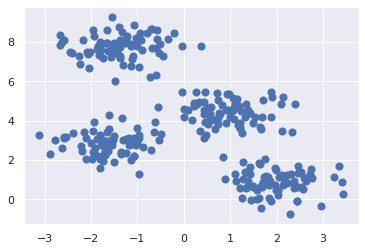

In [ ]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state = 0)
plt.scatter(X[:,0], X[:,1], s=50);
X.shape

In [ ]:
from sklearn.metrics import pairwise_distances_argmin

In [ ]:
def encontrar_clusters(X, n_clusters, rseed=2):
  rng = np.random.RandomState(rseed)
  i = rng.permutation(X.shape[0])[:n_clusters]
  centers = X[i]
  
  while True:
    etiquetas = pairwise_distances_argmin(X, centers)
    nuevos_centros = np.array([X[etiquetas==i].mean(0) for i in range(n_clusters)])
    if np.all(centers==nuevos_centros):
      break
    centers = nuevos_centros  
  return centers, etiquetas


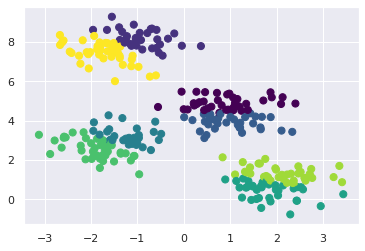

In [ ]:
centros, etiquetas = encontrar_clusters(X, 8)
plt.scatter(X[:,0], X[:,1], c=etiquetas, s=50, cmap='viridis');

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=8)
km.fit(X)
y_km = km.predict(X)

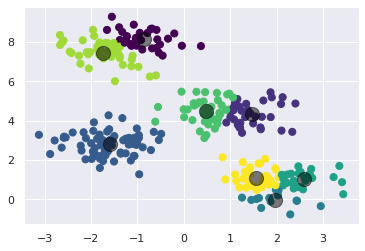

In [ ]:
plt.scatter(X[:,0], X[:,1], c=y_km, s=50, cmap='viridis')
centros = km.cluster_centers_
plt.scatter(centros[:,0], centros[:,1], c='black', s=200, alpha=0.5);

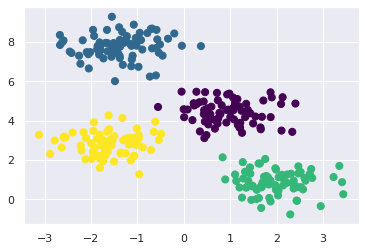

In [ ]:
centros, etiquetas = encontrar_clusters(X, 4)
plt.scatter(X[:,0], X[:,1], c=etiquetas, s=50, cmap='viridis');

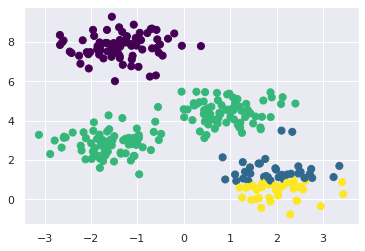

In [ ]:
centros, etiquetas = encontrar_clusters(X, 4,0)
plt.scatter(X[:,0], X[:,1], c=etiquetas, s=50, cmap='viridis');

In [ ]:
import nltk

In [ ]:
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d
  Identifier> alpino

Download which package (l=list; x=cancel)?
      Unzipping corpora/alpino.zip.

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> abc
      Unzipping corpora/abc.zip.

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d
  Identifier> punkt

Download which package (l=list; x=cancel)?
      Unzip

True

# Procesamiento de Lenguaje Natural

In [ ]:
from bs4 import BeautifulSoup
import urllib.request


In [ ]:
response = urllib.request.urlopen('https://librefinanciero.com')

In [ ]:
html = response.read()


In [ ]:
html

b'<!DOCTYPE html>\r\n<html lang="en-US">\r\n<head>\r\n\t<meta charset="UTF-8">\r\n\t<meta name="viewport" content="width=device-width, initial-scale=1">\r\n\t<link rel="profile" href="https://gmpg.org/xfn/11">\r\n\t<style type="text/css">\t\t\t.heateorSssInstagramBackground{background:radial-gradient(circle at 30% 107%,#fdf497 0,#fdf497 5%,#fd5949 45%,#d6249f 60%,#285aeb 90%)}\n\t\t\t\t\t\t\t\t\t\t\t.heateor_sss_horizontal_sharing .heateorSssSharing,.heateor_sss_standard_follow_icons_container .heateorSssSharing{\n\t\t\t\t\t\t\tcolor: #fff;\n\t\t\t\t\t\tborder-width: 0px;\n\t\t\tborder-style: solid;\n\t\t\tborder-color: transparent;\n\t\t}\n\t\t\t\t.heateor_sss_horizontal_sharing .heateorSssTCBackground{\n\t\t\tcolor:#666;\n\t\t}\n\t\t\t\t.heateor_sss_horizontal_sharing .heateorSssSharing:hover,.heateor_sss_standard_follow_icons_container .heateorSssSharing:hover{\n\t\t\t\t\t\tborder-color: transparent;\n\t\t}\n\t\t.heateor_sss_vertical_sharing .heateorSssSharing,.heateor_sss_floating_

In [ ]:
soup = BeautifulSoup(html, 'html5lib')
soup

<!DOCTYPE html>
<html lang="en-US"><head>
	<meta charset="utf-8"/>
	<meta content="width=device-width, initial-scale=1" name="viewport"/>
	<link href="https://gmpg.org/xfn/11" rel="profile"/>
	<style type="text/css">			.heateorSssInstagramBackground{background:radial-gradient(circle at 30% 107%,#fdf497 0,#fdf497 5%,#fd5949 45%,#d6249f 60%,#285aeb 90%)}
											.heateor_sss_horizontal_sharing .heateorSssSharing,.heateor_sss_standard_follow_icons_container .heateorSssSharing{
							color: #fff;
						border-width: 0px;
			border-style: solid;
			border-color: transparent;
		}
				.heateor_sss_horizontal_sharing .heateorSssTCBackground{
			color:#666;
		}
				.heateor_sss_horizontal_sharing .heateorSssSharing:hover,.heateor_sss_standard_follow_icons_container .heateorSssSharing:hover{
						border-color: transparent;
		}
		.heateor_sss_vertical_sharing .heateorSssSharing,.heateor_sss_floating_follow_icons_container .heateorSssSharing{
							color: #fff;
						border-width: 0px;
			bo

In [ ]:
texto = soup.get_text(strip=True)
from nltk.tokenize import word_tokenize
tokens = word_tokenize(texto, 'spanish')
print(tokens)

['.heateorSssInstagramBackground', '{', 'background', ':', 'radial-gradient', '(', 'circle', 'at', '30', '%', '107', '%', ',', '#', 'fdf497', '0', ',', '#', 'fdf497', '5', '%', ',', '#', 'fd5949', '45', '%', ',', '#', 'd6249f', '60', '%', ',', '#', '285aeb', '90', '%', ')', '}', '.heateor_sss_horizontal_sharing', '.heateorSssSharing', ',', '.heateor_sss_standard_follow_icons_container', '.heateorSssSharing', '{', 'color', ':', '#', 'fff', ';', 'border-width', ':', '0px', ';', 'border-style', ':', 'solid', ';', 'border-color', ':', 'transparent', ';', '}', '.heateor_sss_horizontal_sharing', '.heateorSssTCBackground', '{', 'color', ':', '#', '666', ';', '}', '.heateor_sss_horizontal_sharing', '.heateorSssSharing', ':', 'hover', ',', '.heateor_sss_standard_follow_icons_container', '.heateorSssSharing', ':', 'hover', '{', 'border-color', ':', 'transparent', ';', '}', '.heateor_sss_vertical_sharing', '.heateorSssSharing', ',', '.heateor_sss_floating_follow_icons_container', '.heateorSssShar

In [ ]:
def imprimir(tokens):
  for t in tokens:
    print(t)

In [ ]:
imprimir(tokens)

Se truncaron las últimas líneas 5000 del resultado de transmisión.
Hitos
Libertad
Financiera
©
LibreFinanciero.com
Hito
Independencia
Financiera
#
1
–
Cambio
de
mentalidad
Este
hito
se
alcanza
cambiando
la
manera
en
la
que
vemos
nuestras
finanzas
gracias
a
recursos
como
los
que
puedes
encontrar
en
este
blog
.
Probablemente
es
el
hito
más
importante
,
puesto
que
si
no
decides
reenfocar
tu
futuro
financiero
,
todo
lo
demás
no
es
posible
.
Tú
has
decidido
estar
en
el
bando
de
los
ganadores
y
quieres
alcanzar
la
libertad
financiera
,
por
tanto
espero
que
este
hito
ya
lo
hayas
conseguido
después
de
haber
visto
que
existe
una
alternativa
a
trabajar
hasta
la
jubilación
intercambiando
tu
preciado
tiempo
por
dinero
.
Hito
Independencia
Financiera
#
2
–
Fondo
de
emergencia
Antes
de
empezar
a
invertir
,
necesitas
tener
un
fondo
de
emergencia
para
cubrir
tus
gastos
durante
un
periodo
entre
6
y
18
meses
(
depende
de
tu
tolerancia
al
riesgo
)
,
de
tal
manera
que
si
mañana
te
quedas
sin
tu
principal


In [ ]:
len(tokens)

23159

In [ ]:
num_palabras = []
num_palabras.append(len(tokens))

In [ ]:
tokens = [w.lower() for w in tokens if w.isalpha() ]
num_palabras.append(len(tokens))

In [ ]:
num_palabras

[23159, 16373]

In [ ]:
imprimir(tokens)

Se truncaron las últimas líneas 5000 del resultado de transmisión.
poderosa
cuando
quieras
adquirir
un
producto
que
veas
no
lo
compres
de
inmediato
espérate
horas
y
si
después
de
ese
plazo
consideras
que
lo
sigues
necesitando
adelante
revisa
las
opciones
de
planes
gratuitos
en
tu
ciudad
ahorrar
dinero
no
supone
quedarse
en
casa
hay
multitud
de
actividades
que
realizar
gratis
o
días
concretos
en
los
que
aprovechar
por
ejemplo
visitas
a
museos
o
conciertos
a
coste
otra
opción
interesante
son
aplicaciones
como
groupon
o
fever
donde
encontrarás
importantes
descuentos
para
tus
planes
en
tu
ciudad
ahórrate
la
tarifa
mensual
del
gimnasio
no
es
necesario
ir
al
gimnasio
para
estar
en
forma
puedes
salir
a
correr
jugar
a
algún
deporte
o
hacer
ejercicios
en
casa
con
los
millones
de
canales
de
fitness
que
hay
en
youtube
simplemente
filtra
por
algo
como
rutinas
de
ejercicios
cuida
de
tu
salud
aunque
esto
no
parezca
un
consejo
financiero
ten
por
seguro
que
cuidar
tu
alimentación
y
hacer
ejercicio
te


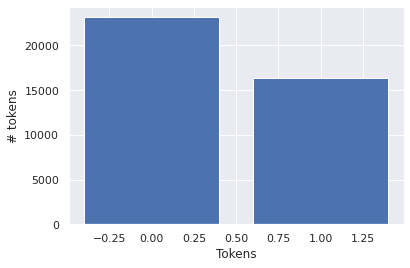

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.ylabel('# tokens')
plt.xlabel('Tokens')
x = np.arange(2)
plt.bar(x, num_palabras)
plt.show()

In [ ]:
freq = nltk.FreqDist(tokens)
for key, val in freq.items():
  print(str(key) + '\t' + str(val))

background	6
circle	1
at	1
color	31
fff	2
solid	3
transparent	9
hover	23
media	5
screen	3
and	6
display	10
none	11
important	29
white	1
li	21
width	5
block	2
auto	2
bottom	1
top	3
inherit	1
la	441
libertad	69
financiera	82
y	286
context	1
https	31
graph	1
type	7
person	1
organization	1
id	11
name	3
image	1
imageobject	2
personlogo	2
inlanguage	4
url	8
caption	1
logo	1
website	3
financiero	12
alcanza	3
independencia	29
description	2
publisher	1
potentialaction	2
searchaction	1
target	2
required	1
primaryimage	2
height	2
webpage	2
ispartof	1
about	1
primaryimageofpage	1
datepublished	1
datemodified	1
alcanzar	43
tener	42
vida	31
que	670
deseas	2
se	86
puede	22
en	470
este	123
blog	18
las	107
readaction	1
var	27
true	5
disablestr	5
function	28
to	5
detect	1
opted	1
out	3
users	1
return	14
disable	1
tracking	1
if	41
the	5
cookie	1
exists	1
window	7
dec	1
utc	1
i	18
s	1
o	59
g	1
r	7
a	350
m	2
arguments	3
date	2
document	4
else	8
noopfn	5
null	5
noopnullfn	2
tracker	2
p	2
len	2
f	3
typeof	3


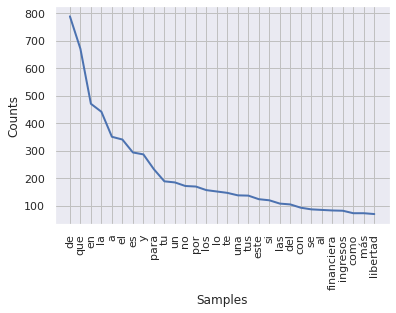

In [ ]:
import seaborn as sns
sns.set()
freq.plot(30, cumulative=False)

In [ ]:
from nltk.corpus import stopwords
clean_tokens = tokens[:]
for token in tokens:
  if token in stopwords.words('spanish'):
    clean_tokens.remove(token)

In [ ]:
num_palabras.append(len(clean_tokens))

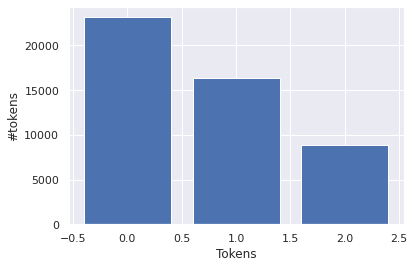

In [ ]:
plt.ylabel('#tokens')
plt.xlabel('Tokens')
x = np.arange(3)
plt.bar(x, num_palabras)
plt.show()

In [ ]:
num_palabras

[23159, 16373, 8908]

In [ ]:
imprimir(clean_tokens)

Se truncaron las últimas líneas 5000 del resultado de transmisión.
noviembre
cyber
monday
siguiente
lunes
después
black
friday
fechas
clave
poder
adquirir
productos
tecnológicos
importantes
descuentos
ojo
marketing
fechas
abusivo
muchas
ocasiones
verás
descuentos
realidad
hace
subir
precio
base
rebajar
producto
valía
anteriormente
ser
consciente
buena
idea
verificar
evolución
precio
artículos
amazon
través
herramientas
explicó
post
si
necesita
tener
último
gadget
tecnológico
última
versión
importante
prestes
atención
eventos
mobile
world
congress
finales
febrero
ifa
principios
septiembre
eventos
presentan
multitud
productos
tecnológicos
puedes
aprovechar
fuertes
descuentos
realizan
marcas
artículo
predecesor
decir
si
samsung
apple
presentan
nueva
versión
smartphone
insignia
esperar
justo
versión
previa
smartphone
importante
rebaja
vivienda
según
estudios
trovimap
mejor
estación
compra
vivienda
después
verano
septiembre
competencia
baja
puesto
competir
compradores
quieren
casa
vacacione

In [ ]:
freq = nltk.FreqDist(clean_tokens)
for key, val in freq.items():
  print(str(key) + '\t' + str(val))

background	6
circle	1
at	1
color	31
fff	2
solid	3
transparent	9
hover	23
media	5
screen	3
and	6
display	10
none	11
important	29
white	1
li	21
width	5
block	2
auto	2
bottom	1
top	3
inherit	1
libertad	69
financiera	82
context	1
https	31
graph	1
type	7
person	1
organization	1
id	11
name	3
image	1
imageobject	2
personlogo	2
inlanguage	4
url	8
caption	1
logo	1
website	3
financiero	12
alcanza	3
independencia	29
description	2
publisher	1
potentialaction	2
searchaction	1
target	2
required	1
primaryimage	2
height	2
webpage	2
ispartof	1
about	1
primaryimageofpage	1
datepublished	1
datemodified	1
alcanzar	43
tener	42
vida	31
deseas	2
puede	22
blog	18
readaction	1
var	27
true	5
disablestr	5
function	28
to	5
detect	1
opted	1
out	3
users	1
return	14
disable	1
tracking	1
if	41
the	5
cookie	1
exists	1
window	7
dec	1
utc	1
i	18
s	1
g	1
r	7
m	2
arguments	3
date	2
document	4
else	8
noopfn	5
null	5
noopnullfn	2
tracker	2
p	2
len	2
f	3
typeof	3
running	1
because	1
you	5
are	6
not	4
being	2
try	1
catch	1
ex

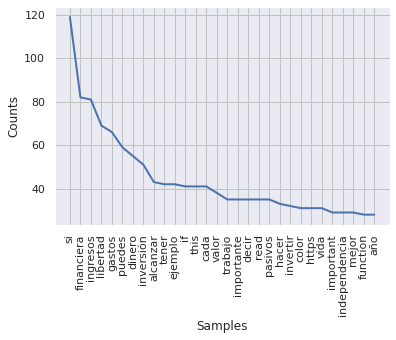

In [ ]:
sns.set()
freq.plot(30, cumulative=False)

#Ensembles

In [ ]:
import pandas as pd
from google.colab import files
subido = files.upload()
import io
pima = pd.read_csv(io.BytesIO(subido['diabetes.csv']))


Saving diabetes.csv to diabetes.csv


In [ ]:
X = pima.iloc[:,0:8]
Y = pima.iloc[:,8]
#estandarizacion
from sklearn.preprocessing import StandardScaler
rescaledX = StandardScaler().fit_transform(X)
Xnuevo = pd.DataFrame(data = rescaledX, columns = X.columns)
print(Xnuevo.head())
print(Y)

   Pregnancies   Glucose  ...  DiabetesPedigreeFunction       Age
0    -0.843726 -1.122086  ...                 -0.364265 -0.188940
1     1.234240  1.944476  ...                  0.604701 -0.103795
2    -0.843726 -0.996920  ...                 -0.919684 -1.040393
3    -1.140579  0.505069  ...                  5.482732 -0.018650
4     0.343683 -0.152051  ...                 -0.817052 -0.274086

[5 rows x 8 columns]
0      0
1      1
2      0
3      1
4      0
      ..
762    0
763    0
764    0
765    1
766    0
Name: Class, Length: 767, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(Xnuevo, Y, random_state=22, test_size=0.2 )
modelos = []
modelos.append(('Naive Bayes', GaussianNB()))
modelos.append(('SVM', SVC()))
modelos.append(('Arboles de Decisión', DecisionTreeClassifier()))

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

In [ ]:
#bagging
modelos.append(('Bagging AD', BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=15)))
modelos.append(('Bagging SVM', BaggingClassifier(base_estimator=SVC(), n_estimators=10, random_state=15)))

In [ ]:
#random forest
num_arboles = 300
max_features = 3
modelos.append(('Random Forest', RandomForestClassifier(n_estimators=num_arboles, max_features=max_features)))

In [ ]:
#Extra trees
modelos.append(("Extra Trees", ExtraTreesClassifier(n_estimators=num_arboles, max_features=max_features)))

In [ ]:
#Ada Boost
modelos.append(('Adaboost', AdaBoostClassifier(n_estimators=100, random_state=15)))

In [ ]:
#Stochastic 
modelos.append(('Gradient Boosting', GradientBoostingClassifier(n_estimators=num_arboles, random_state=15)))

# PLN

In [ ]:
import nltk


In [ ]:
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> 

EOFError: ignored

In [ ]:
import io
import pandas as pd
from google.colab import files
subido = files.upload()


Saving data.txt to data.txt


In [ ]:
from bs4 import BeautifulSoup
import urllib.request

f = open('data.txt', 'r')
texto = BeautifulSoup(f, 'html5lib')
texto = texto.get_text(strip=True)
print(texto)

Te ofrecemos mejores servicios
Buenas tardes, te ofrecemos los mejores servicios
Oferta de nuevos celulares
Bienvenido al webinar de la universidad
Notas del curso de Inteligencia Artificial
Encuesta del curso de Machine Learning
Oferta de viajes a Europa
Matrícula para el semestre 2020-2
Compra el nuevo servicio de telefonía celular
Trabajo final del curso de Machine Learning


In [ ]:
from nltk.tokenize import word_tokenize
tokens = word_tokenize(texto, 'spanish')
print(tokens)

LookupError: ignored

In [ ]:
import nltk

In [ ]:
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> 

EOFError: ignored

# PLN

In [ ]:
import nltk 
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> alpino
      Unzipping corpora/alpino.zip.

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords
      Unzipping corpora/stopwords.zip.

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> abc
 

True

In [ ]:
import io
import pandas as pd
from google.colab import files
subido = files.upload()

Saving corpus_covid19.txt to corpus_covid19.txt


In [ ]:
from bs4 import BeautifulSoup
import urllib.request
f = open('corpus_covid19.txt', 'r')
soup = BeautifulSoup(f,'html5lib')
texto = soup.get_text(strip=True)
f.close()

In [ ]:
def imprimir_texto(texto,num_char=10):
  i = 1
  for x in texto.split('\n'):
    cadena, clase = x.split('----->')
    print('{}\t{}\t{}'.format(i, cadena[:num_char], clase))
    i+=1

In [ ]:
imprimir_texto(texto, 100)

1	Aparecen nuevos efectos. El pasado 2 de diciembre venía surgiendo en China, el primer brote por coro	Síntomas_COVID-19
2	Este último miércoles el reporte de la OMS fue realmente para alertarse, pues, aseguran que las cifr	Síntomas_COVID-19
3	Las personas que más tendencia tienen a complicarse son las personas obesas, con diabetes, presión a	Síntomas_COVID-19
4	La gripe suele ser un poco más aparatosa porque suele tener mayor mucosidad y la persona puede estar	Síntomas_COVID-19
5	La especialista asegura que las personas muchas veces suelen confundir ambas enfermedades, pues pese	Síntomas_COVID-19
6	El Ministerio de Salud (Minsa) instaló un grupo de trabajo multisectorial que se encargará de explor	General
7	El objetivo es que los peruanos tengan acceso “lo más pronto posible” a la futura vacuna contra el c	General
8	El ministro de Salud, Víctor Zamora, encabezó la reunión de instalación y dijo que el grupo alinea l	General
9	Las funciones básicas del grupo son formular y proponer line

In [ ]:
!pip install spicy

In [ ]:
import spacy
spacy.cli.download('es_core_news_md')

✔ Download and installation successful
You can now load the model via spacy.load('es_core_news_md')


In [ ]:
nlp = spacy.load('es_core_news_md')

In [ ]:
def extraer_texto(texto):
  X_cadenas = []
  Y_cadena = []
  textoSalida = ''
  for x in texto.split('\n'):
    cadena, clase = x.split('----->')
    textoSalida += cadena + " "
    Y_cadena.append(clase)
    X_cadenas.append(cadena)
  return textoSalida, X_cadenas, Y_cadena

In [ ]:
texto, X_cadenas, Y_cadena = extraer_texto(texto)

In [ ]:
print(Y_cadena)
print(len(Y_cadena))

['Síntomas_COVID-19', 'Síntomas_COVID-19', 'Síntomas_COVID-19', 'Síntomas_COVID-19', 'Síntomas_COVID-19', 'General', 'General', 'General', 'General', 'General', 'General', 'General', 'General', 'General', 'General', 'General', 'General', 'General', 'General', 'General', 'Síntomas_COVID-19', 'Síntomas_COVID-19', 'Síntomas_COVID-19', 'Síntomas_COVID-19', 'General', 'General', 'General', 'General', 'General', 'General']
30


In [ ]:
print(X_cadenas)
print(len(X_cadenas))

['Aparecen nuevos efectos. El pasado 2 de diciembre venía surgiendo en China, el primer brote por coronavirus, donde se incluía claramente síntomas que relacionaban a la enfermedad, que hasta la actualidad, ha tomado un número poco alentador en cuanto a los contagiados. En esa línea, los primeros efectos de la enfermedad eran tos seca persistente, fiebre y fatiga muscular. Algo que a lo largo de esta pandemia ha continuado y ha causado que las personas dieran una atención más rápida al conocerla. Sin embargo, ha venido pasando los meses y casualmente a la larga propagación del COVID-19, del que hasta este último fin de semana presenta poco más de 3 millones  de infectados en el mundo, ha decretado que a sorpresa de muchos los síntomas han ido variando y a los tres antes mencionados se sumaron algunos más. Así, desde los Centros para el Control y la Prevención de Enfermedades, conocida como  CDC por sus siglas, han dado a conocer seis nuevos síntomas en la lista que otorga esta terrible

In [ ]:
print(texto)

Aparecen nuevos efectos. El pasado 2 de diciembre venía surgiendo en China, el primer brote por coronavirus, donde se incluía claramente síntomas que relacionaban a la enfermedad, que hasta la actualidad, ha tomado un número poco alentador en cuanto a los contagiados. En esa línea, los primeros efectos de la enfermedad eran tos seca persistente, fiebre y fatiga muscular. Algo que a lo largo de esta pandemia ha continuado y ha causado que las personas dieran una atención más rápida al conocerla. Sin embargo, ha venido pasando los meses y casualmente a la larga propagación del COVID-19, del que hasta este último fin de semana presenta poco más de 3 millones  de infectados en el mundo, ha decretado que a sorpresa de muchos los síntomas han ido variando y a los tres antes mencionados se sumaron algunos más. Así, desde los Centros para el Control y la Prevención de Enfermedades, conocida como  CDC por sus siglas, han dado a conocer seis nuevos síntomas en la lista que otorga esta terrible e

In [ ]:
doc = nlp(texto)

In [ ]:
from spacy import displacy
displacy.render(doc, style='ent', jupyter=True)

In [ ]:
for token in doc.ents:
  print(token.text, token.label_)

China LOC
Algo que a lo largo MISC
Sin embargo MISC
Así MISC
Centros para el Control y la Prevención de Enfermedades ORG
CDC ORG
Escalofríos MISC
Temblores LOC
Dolor muscular MISC
Dolor de cabeza MISC
Dolor de garganta MISC
Pérdida reciente del olfato MISC
Asimismo MISC
No obstante MISC
OMS ORG
Organización Mundial de Salud ORG
OMS ORG
OMS ORG
Estados Unidos LOC
Brasil LOC
Rusia LOC
Arabia Saudita LOC
India LOC
Qatar LOC
Perú LOC
Dificultad LOC
Se suman a los conocidos MISC
Escalofríos. MISC
Temblores LOC
Dolor muscular MISC
Dolor de cabeza Dolor de garganta MISC
Pérdida reciente del olfato MISC
Las personas MISC
La más frecuente y letal MISC
No MISC
La gripe MISC
En el caso del coronavirus MISC
La especialista MISC
El Ministerio de Salud MISC
Minsa MISC
El objetivo MISC
China LOC
El ministro de Salud MISC
Víctor Zamora PER
Salud MISC
Perú LOC
Minsa MISC
Minsa ORG
El grupo de trabajo multisectorial de naturaleza temporal MISC
Resolución Ministerial N MISC
Salud MISC
Salud Pública ORG
E

In [ ]:
for token in doc.ents:
  print(token.text, end=' | ')

China | Algo que a lo largo | Sin embargo | Así | Centros para el Control y la Prevención de Enfermedades | CDC | Escalofríos | Temblores | Dolor muscular | Dolor de cabeza | Dolor de garganta | Pérdida reciente del olfato | Asimismo | No obstante | OMS | Organización Mundial de Salud | OMS | OMS | Estados Unidos | Brasil | Rusia | Arabia Saudita | India | Qatar | Perú | Dificultad | Se suman a los conocidos | Escalofríos. | Temblores | Dolor muscular | Dolor de cabeza Dolor de garganta | Pérdida reciente del olfato | Las personas | La más frecuente y letal | No | La gripe | En el caso del coronavirus | La especialista | El Ministerio de Salud | Minsa | El objetivo | China | El ministro de Salud | Víctor Zamora | Salud | Perú | Minsa | Minsa | El grupo de trabajo multisectorial de naturaleza temporal | Resolución Ministerial N | Salud | Salud Pública | EsSalud | Fuerzas Armadas y Policiales. | Martín Vizcarra | Covid-19 | La medida | DIRECTO | Covid-19 | El Ministerio de Salud | Minsa 

# Lematización

In [ ]:
tokens = []
for token in doc:
  print(token.text + ' ----> ' + token.lemma_)
  tokens.append(token.lemma_)

Aparecen ----> Aparecen
nuevos ----> nuevo
efectos ----> efecto
. ----> .
El ----> El
pasado ----> pasar
2 ----> 2
de ----> de
diciembre ----> diciembre
venía ----> venir
surgiendo ----> surgir
en ----> en
China ----> China
, ----> ,
el ----> el
primer ----> ﻿1
brote ----> brotar
por ----> por
coronavirus ----> coronavirus
, ----> ,
donde ----> donde
se ----> se
incluía ----> incluir
claramente ----> claramente
síntomas ----> síntoma
que ----> que
relacionaban ----> relacionar
a ----> a
la ----> lo
enfermedad ----> enfermedad
, ----> ,
que ----> que
hasta ----> hasta
la ----> lo
actualidad ----> actualidad
, ----> ,
ha ----> haber
tomado ----> tomar
un ----> uno
número ----> número
poco ----> poco
alentador ----> alentador
en ----> en
cuanto ----> cuanto
a ----> a
los ----> lo
contagiados ----> contagiar
. ----> .
En ----> En
esa ----> ese
línea ----> líneo
, ----> ,
los ----> lo
primeros ----> primero
efectos ----> efecto
de ----> de
la ----> lo
enfermedad ----> enfermedad
eran ----> 

In [ ]:
len(tokens)

2827

In [ ]:
tokens = [w.lower() for w in tokens if w.isalpha()]
len(tokens)

2418

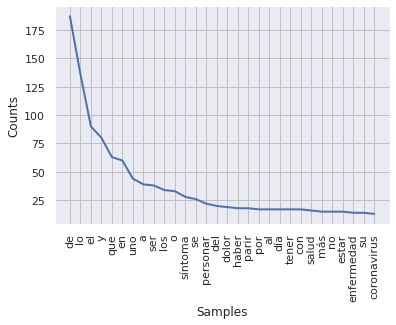

In [ ]:
import seaborn as sns
sns.set()
freq = nltk.FreqDist(tokens)
freq.plot(30, cumulative = False)

In [ ]:
for x in nlp.Defaults.stop_words:
  print(x)

todas
nuestra
momento
decir
acuerdo
diferentes
hago
ellas
quiénes
estais
podriamos
último
ir
indicó
somos
nuestro
soy
un
tú
desde
qué
aquí
consiguen
manifestó
ningunas
no
otra
expresó
buena
dos
pesar
míos
luego
tal
detrás
tanto
aun
nada
gueno
fuera
dan
había
va
cuánta
nuestras
tuyos
algún
durante
hecho
antes
esta
trabajar
aproximadamente
vosotras
próximo
misma
ningún
mias
intentas
aqui
largo
través
estos
alguna
pocos
ésa
te
podrán
tenemos
conseguimos
poca
muy
podria
existe
hacen
aquél
será
menos
nuestros
sera
éste
ese
estado
usais
puede
otros
otras
cuales
podría
usan
sigue
sobre
alrededor
siete
empleais
pasado
tercera
afirmó
dado
hoy
mía
veces
era
os
lado
modo
solos
pues
tener
siendo
habia
llevar
ciertas
tendrán
ha
podrias
nuevas
nadie
debajo
para
tenía
solo
cuándo
haber
repente
cualquier
atras
dar
son
aquéllos
breve
cierta
supuesto
además
contra
fueron
vais
sabeis
tiene
quizas
detras
ciertos
voy
segunda
todo
mucha
ésos
toda
sabemos
el
dicho
fuimos
mia
bajo
eres
agregó
aquéllas
cerca
c

In [ ]:
#detectando si una palabra está dentro del diccionario de stopwords
print(nlp.vocab['de'].is_stop)
print(nlp.vocab['Lima'].is_stop)
print(nlp.vocab['chau'].is_stop)

True
False
False


In [ ]:
#Agregar stopword
palabra = 'chau'

nlp.Defaults.stop_words.add(palabra)
nlp.vocab[palabra].is_stop = True

In [ ]:
nlp.vocab['chau'].is_stop

True

In [ ]:
tam = len(nlp.Defaults.stop_words)
print(tam)

552


In [ ]:
#Eliminar stopword
palabra = 'chau'

nlp.Defaults.stop_words.remove(palabra)
nlp.vocab[palabra].is_stop = False

In [ ]:
nlp.vocab['chau'].is_stop

False

In [ ]:
tam = len(nlp.Defaults.stop_words)
print(tam)

551


In [ ]:
#Usar los stopwords para eliminar tokens irrelavantes
tokens2 = tokens[:]
for token in tokens:
  if nlp.vocab[token].is_stop == True:
    tokens2.remove(token)

In [ ]:
print(len(tokens))
print(len(tokens2))

2418
1306


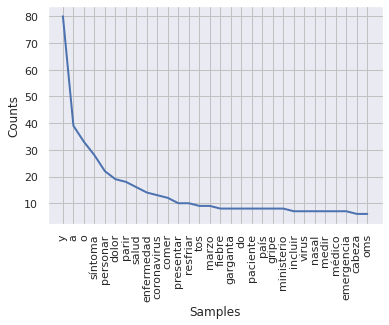

In [ ]:
freq = nltk.FreqDist(tokens2)
freq.plot(30, cumulative = False)


In [ ]:
palabras_irrelavantes = ['y', 'a', 'o', 'do', 'personar', 'medir', 'país', 'comer', 'parir', 'incluir']
tokens = tokens2[:]
for token in tokens2:
  if token in palabras_irrelavantes:
    tokens.remove(token)

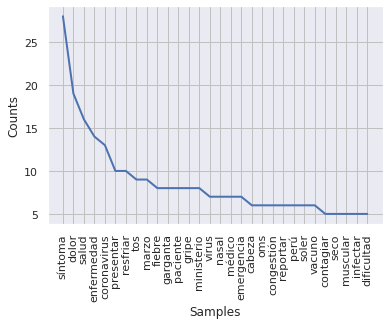

In [ ]:
freq = nltk.FreqDist(tokens)
freq.plot(30, cumulative = False)


In [ ]:
for t, val in freq.most_common(100):
  print(str(t) + '\t\t' + str(val))

síntoma		28
dolor		19
salud		16
enfermedad		14
coronavirus		13
presentar		10
resfriar		10
tos		9
marzo		9
fiebre		8
garganta		8
paciente		8
gripe		8
ministerio		8
virus		7
nasal		7
médico		7
emergencia		7
cabeza		6
oms		6
congestión		6
reportar		6
perú		6
soler		6
vacuno		6
contagiar		5
seco		5
muscular		5
infectar		5
dificultad		5
deber		5
casar		5
signo		5
grupo		5
nacional		5
ciudad		5
lima		5
caso		5
niño		5
sanitario		5
común		5
china		4
causar		4
atención		4
listo		4
escalofrío		4
contraer		4
respirar		4
llamar		4
aislamiento		4
minsa		4
buscar		4
peruano		4
presidente		4
social		4
año		4
positivo		4
estornudo		4
secreción		4
efecto		3
brotar		3
fatigar		3
pandemia		3
semana		3
decretar		3
mencionar		3
pérdida		3
olfato		3
gustar		3
entrar		3
señalar		3
organización		3
mundial		3
cansancio		3
experimentar		3
diarrea		3
diabetes		3
crónico		3
ojo		3
nariz		3
ministro		3
plan		3
producto		3
mediar		3
territorio		3
registrar		3
enero		3
prensar		3
comunicar		3
identificar		3
adulto	

In [ ]:
from spacy.matcher import Matcher
matcher = Matcher(nlp.vocab)

patron1 = [{'LOWER':'china'}]
patron2 = [{'LOWER':'marzo'}]
patron3 = [{'LOWER':'aislamiento'}]
patron4 = [{'LOWER':'pandemia'}]

matcher.add('contexto_COVID', None, patron1, patron2, patron3, patron4)

In [ ]:
asociaciones = matcher(doc)
for m_id, inicio, fin in asociaciones:
  s_id = nlp.vocab.strings[m_id]
  span = doc[inicio:fin]
  print(s_id, span.text)

contexto_COVID China
contexto_COVID pandemia
contexto_COVID aislamiento
contexto_COVID China
contexto_COVID aislamiento
contexto_COVID marzo
contexto_COVID pandemia
contexto_COVID marzo
contexto_COVID marzo
contexto_COVID China
contexto_COVID marzo
contexto_COVID marzo
contexto_COVID marzo
contexto_COVID marzo
contexto_COVID aislamiento
contexto_COVID marzo
contexto_COVID marzo
contexto_COVID pandemia
contexto_COVID China
contexto_COVID aislamiento


In [ ]:
texto2 = texto
for m_id, inicio, fin in asociaciones:
  s_id = nlp.vocab.strings[m_id]
  span = doc[inicio:fin]
  texto2 = texto2.replace(span.text, s_id)

In [ ]:
print(texto)
print(texto2)

Aparecen nuevos efectos. El pasado 2 de diciembre venía surgiendo en China, el primer brote por coronavirus, donde se incluía claramente síntomas que relacionaban a la enfermedad, que hasta la actualidad, ha tomado un número poco alentador en cuanto a los contagiados. En esa línea, los primeros efectos de la enfermedad eran tos seca persistente, fiebre y fatiga muscular. Algo que a lo largo de esta pandemia ha continuado y ha causado que las personas dieran una atención más rápida al conocerla. Sin embargo, ha venido pasando los meses y casualmente a la larga propagación del COVID-19, del que hasta este último fin de semana presenta poco más de 3 millones  de infectados en el mundo, ha decretado que a sorpresa de muchos los síntomas han ido variando y a los tres antes mencionados se sumaron algunos más. Así, desde los Centros para el Control y la Prevención de Enfermedades, conocida como  CDC por sus siglas, han dado a conocer seis nuevos síntomas en la lista que otorga esta terrible e

In [ ]:
import pandas as pd
df = pd.DataFrame(
    [
     [1,0,1],
     [1,0,1],
     [1,0,1],
     [0,1,0],
     [0,1,0],
     [0,1,0],
     [1,0,1],
     [0,1,0],
     [1,0,1],
     [0,1,0]
    ]
)

In [ ]:
df.head()

0  1  2
0  1  0  1
1  1  0  1
2  1  0  1
3  0  1  0
4  0  1  0

In [ ]:
X = df.iloc[:,0:2]
Y = df.iloc[:,2]
print(X)
print(Y)

   0  1
0  1  0
1  1  0
2  1  0
3  0  1
4  0  1
5  0  1
6  1  0
7  0  1
8  1  0
9  0  1
0    1
1    1
2    1
3    0
4    0
5    0
6    1
7    0
8    1
9    0
Name: 2, dtype: int64


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

mlp = MLPClassifier(hidden_layer_sizes=(1,), max_iter=10, learning_rate_init=0.3, activation='logistic')

In [ ]:
mlp.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(1,), learning_rate='constant',
              learning_rate_init=0.3, max_fun=15000, max_iter=10, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [ ]:
mlp.predict(X_test)

array([0, 0])

In [ ]:
X_test

0  1
1  1  0
6  1  0

In [ ]:
Y_test

1    1
6    1
Name: 2, dtype: int64

In [ ]:
accuracy = (mlp.predict(X_test)==Y_test)

In [ ]:
print(accuracy)

1    False
6    False
Name: 2, dtype: bool


In [ ]:
acc = sum(accuracy)/len(accuracy)
print(acc)

0.0


In [ ]:
k=10
kfold = KFold(n_splits=k)
cv_resultado = cross_val_score(mlp, X, Y, cv=kfold, scoring='f1_macro')
print(cv_resultado)

[0. 1. 1. 1. 0. 1. 1. 1. 1. 0.]


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr

In [ ]:
import numpy as np
promedio = np.mean(cv_resultado)
print('{:.2f}'.format(promedio))

0.70


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)

In [ ]:
accuracy = (Y_pred==Y_test)
acc = sum(accuracy)/len(accuracy)
print(acc)

1.0


In [ ]:
k=10
kfold = KFold(n_splits=k)
cv_resultado = cross_val_score(knn, X, Y, cv=kfold, scoring='f1_macro')
print(cv_resultado)
promedio = np.mean(cv_resultado)
print('{:.2f}'.format(promedio))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1.00
